In [1]:
 %load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import fi_module

In [4]:
% matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus as pdp
from sklearn.utils import resample
import matplotlib.pyplot as plt
import math
import pandas as pd

1000


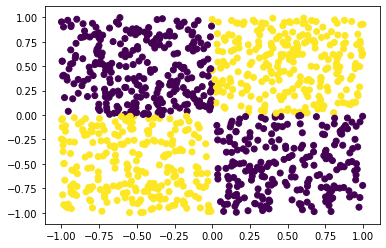

In [5]:
np.random.seed(1)
X_xor_0 = np.random.uniform(-1, 1, (1000, 10))

y_xor_0 = []

for i in range(X_xor_0.shape[0]):
    if (X_xor_0[i, 0] * X_xor_0[i, 1]) >= 0:
        y_xor_0.append( 1 )
    else:
        y_xor_0.append( 0 )
        #print(i)

print(len(y_xor_0))
plt.scatter(X_xor_0[:, 0], X_xor_0[:, 1], c=y_xor_0)

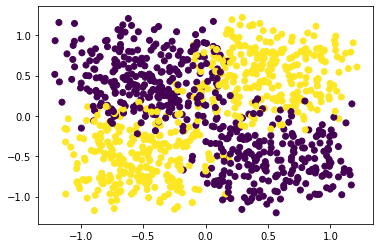

In [6]:
w_xor_0 = np.random.uniform(-0.25, 0.25, (1000, 2))
X_xor_0[:, 0] += w_xor_0[:, 0]
X_xor_0[:, 1] += w_xor_0[:, 1]

plt.scatter(X_xor_0[:, 0], X_xor_0[:, 1], c=y_xor_0)

In [82]:
I_rf, I_basis, I_freq, I_score, I_ucb = fi_module.ex(X_xor_0, y_xor_0, 50, "c", 100, 0.3, 0)

------------------------------
rf's feature importance
X1  : 0.11641
X2  : 0.11679
X3  : 0.10532
X4  : 0.12131
X5  : 0.09876
X6  : 0.09365
X7  : 0.07334
X8  : 0.12311
X9  : 0.0549
X10 : 0.09641
------------------------------
I_basis's feature importance
X1  : 0.13795
X2  : 0.12355
X3  : 0.07734
X4  : 0.09342
X5  : 0.08932
X6  : 0.09554
X7  : 0.08049
X8  : 0.10211
X9  : 0.11156
X10 : 0.08873
------------------------------
I_freq's feature importance
X1  : 0.19262
X2  : 0.16843
X3  : 0.06238
X4  : 0.09326
X5  : 0.07557
X6  : 0.07831
X7  : 0.05349
X8  : 0.10836
X9  : 0.09209
X10 : 0.07549
------------------------------
I_score's feature importance
X1  : 0.13472
X2  : 0.12304
X3  : 0.07891
X4  : 0.09383
X5  : 0.09038
X6  : 0.09584
X7  : 0.08154
X8  : 0.10202
X9  : 0.11011
X10 : 0.08961
------------------------------
I_ucb's feature importance
X1  : 0.18688
X2  : 0.16036
X3  : 0.05581
X4  : 0.09201
X5  : 0.07673
X6  : 0.08349
X7  : 0.05041
X8  : 0.11066
X9  : 0.10854
X10 : 0.07512


In [8]:
I_rf, I_basis_a, I_freq_a, I_score_a, I_ucb_a = fi_module.ex(X_xor_0, y_xor_0, 50, "c", 100, 0.6, 0.48)

------------------------------
rf's feature importance
X1  : 0.11641
X2  : 0.11679
X3  : 0.10532
X4  : 0.12131
X5  : 0.09876
X6  : 0.09365
X7  : 0.07334
X8  : 0.12311
X9  : 0.0549
X10 : 0.09641
------------------------------
I_basis's feature importance
X1  : 0.16844
X2  : 0.15704
X3  : 0.06636
X4  : 0.0836
X5  : 0.08868
X6  : 0.08951
X7  : 0.06266
X8  : 0.10133
X9  : 0.09853
X10 : 0.08385
------------------------------
I_freq's feature importance
X1  : 0.28275
X2  : 0.26383
X3  : 0.04019
X4  : 0.0575
X5  : 0.06415
X6  : 0.05498
X7  : 0.03443
X8  : 0.08792
X9  : 0.05666
X10 : 0.05759
------------------------------
I_score's feature importance
X1  : 0.15561
X2  : 0.14794
X3  : 0.07094
X4  : 0.08746
X5  : 0.09147
X6  : 0.09186
X7  : 0.06548
X8  : 0.10313
X9  : 0.09924
X10 : 0.08687
------------------------------
I_ucb's feature importance
X1  : 0.26777
X2  : 0.25191
X3  : 0.03581
X4  : 0.05817
X5  : 0.07085
X6  : 0.06038
X7  : 0.03098
X8  : 0.10099
X9  : 0.0643
X10 : 0.05884


['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']


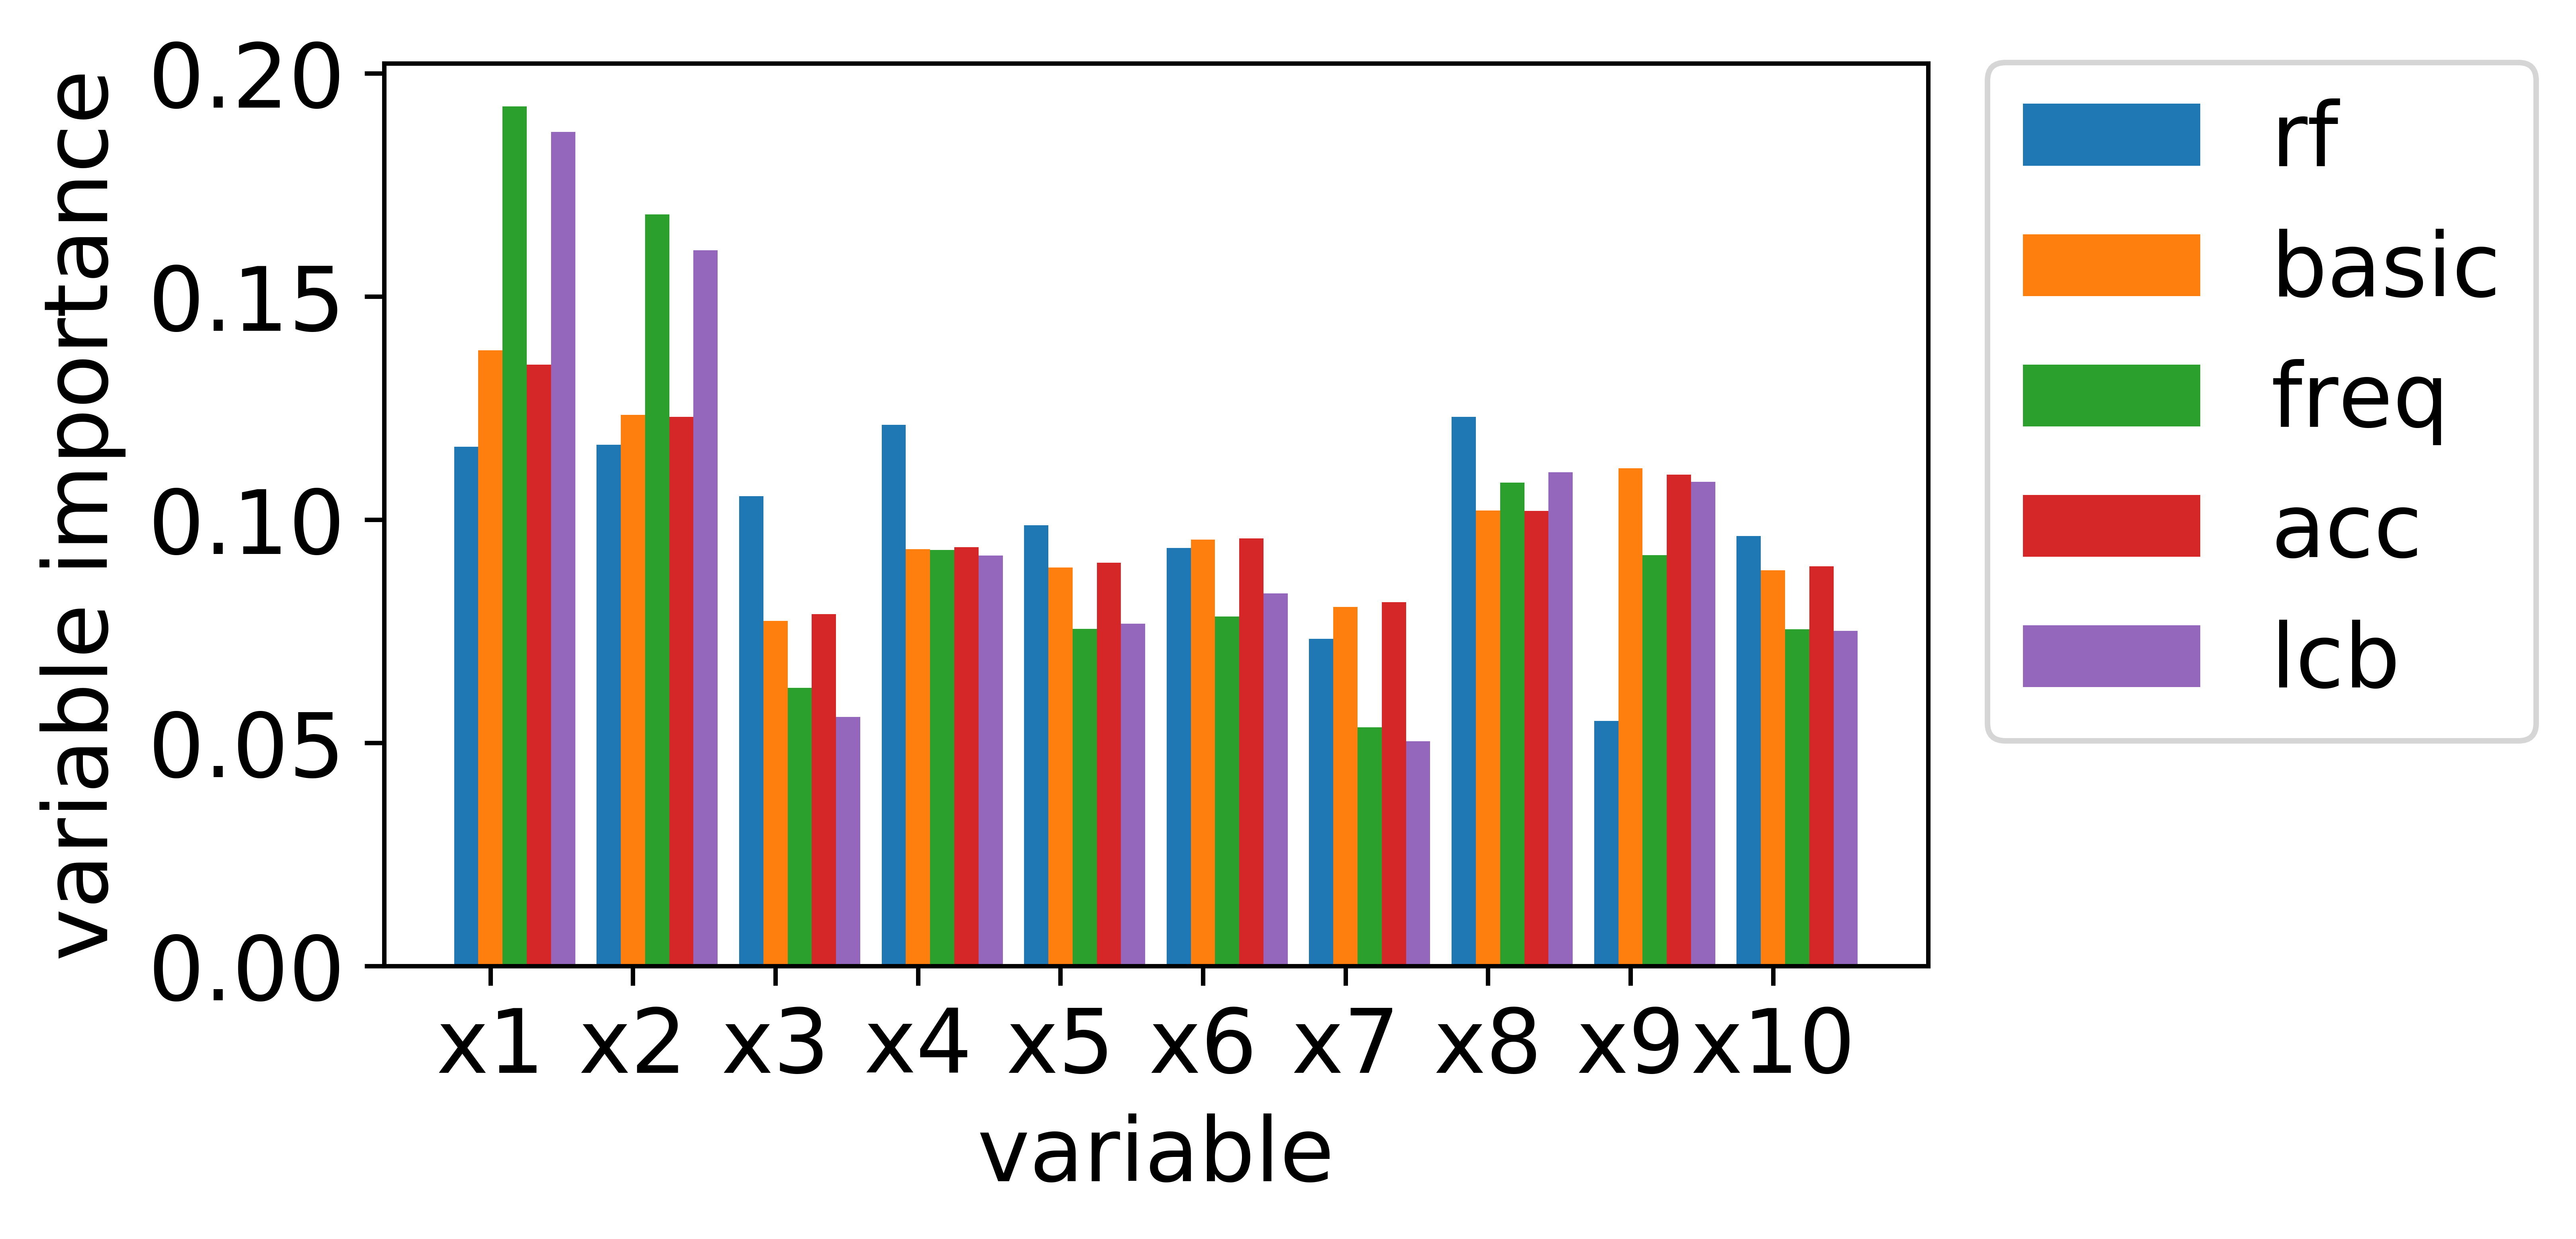

In [84]:
left = np.arange(len(I_rf))
label = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"]
width = 0.17
plt.rcParams["font.size"] = 16
plt.figure(figsize=(5, 3), dpi=1000)
plt.bar(left, I_rf, width=width, align="center")
plt.bar(left+width, I_basis,  width=width, align="center")
plt.bar(left+(width*2), I_freq,  width=width, align="center")
plt.bar(left+(width*3), I_score,  width=width, align="center")
plt.bar(left+(width*4), I_ucb,  width=width, align="center")
plt.xticks(left + width, label)
print(label)

plt.legend(["rf", "basic", "freq", "acc", "lcb"], bbox_to_anchor=(1.01, 1.05))
plt.xlabel('variable')
plt.ylabel("variable importance")

plt.savefig('synthetic.pdf', bbox_inches="tight")

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']


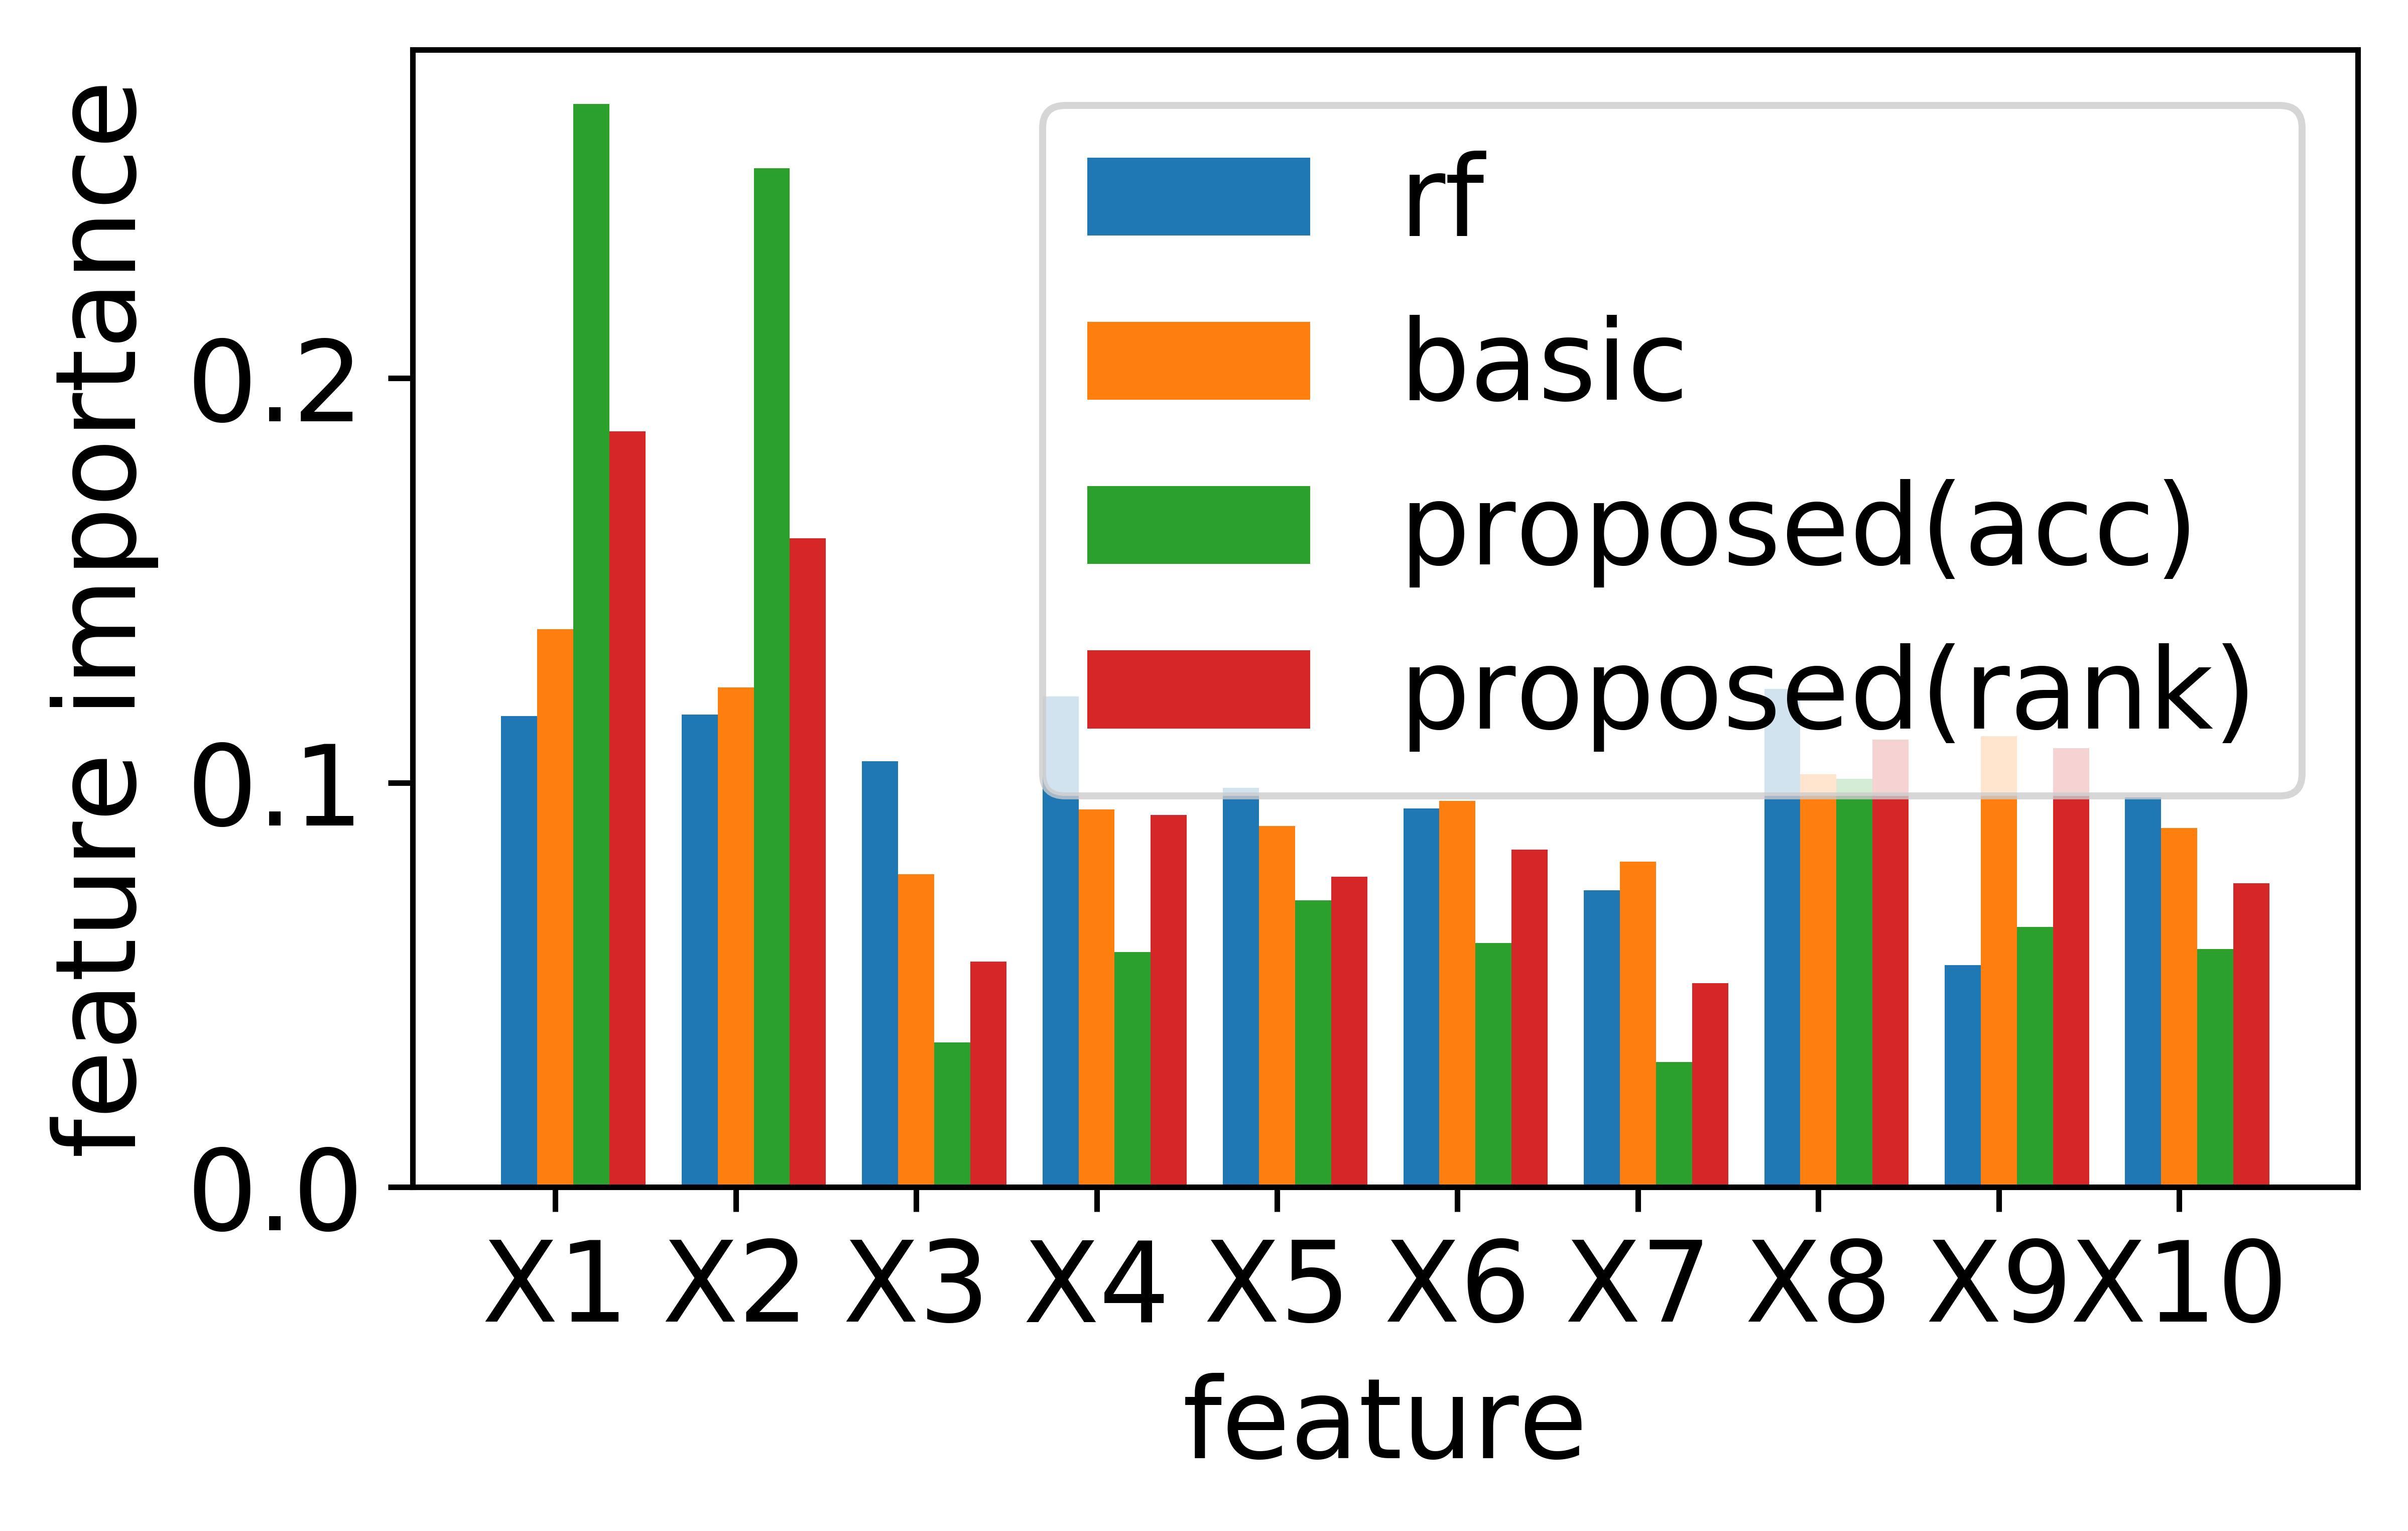

In [10]:
left = np.arange(len(I_rf))
label = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10"]
width = 0.2
plt.rcParams["font.size"] = 16
plt.figure(figsize=(5, 3), dpi=1000)
plt.bar(left, I_rf, width=0.2, align="center")
plt.bar(left+width, I_basis,  width=0.2, align="center")
plt.bar(left+(width*2), I_ucb_a,  width=0.2, align="center")
plt.bar(left+(width*3), I_ucb,  width=0.2, align="center")
plt.xticks(left + width, label)
print(label)

plt.legend(["rf", "basic", "proposed(acc)", "proposed(rank)"])
plt.xlabel('feature')
plt.ylabel("feature importance")

plt.savefig('XOR.pdf', bbox_inches="tight")

# monk1

In [11]:
monk_data1 = pd.read_table('monks-1.train', header=None, sep=' ')
monk_train = monk_data1.drop([0, 8], axis=1)
monk_train.head()

monk_data2 = pd.read_table('monks-1.test', header=None, sep=' ')
monk_test = monk_data2.drop([0, 8], axis=1)
monk_test.head()

monk_all = pd.concat([monk_train, monk_test])
monk_all.head()

1  2  3  4  5  6  7
0  1  1  1  1  1  3  1
1  1  1  1  1  1  3  2
2  1  1  1  1  3  2  1
3  1  1  1  1  3  3  2
4  1  1  1  2  1  2  1

In [12]:
X_monk = monk_all.drop(1, axis=1)
print(X_monk.head())
print("-" * 50)
y_monk = monk_all[1]
y_monk.head()
print(y_monk.head())

   2  3  4  5  6  7
0  1  1  1  1  3  1
1  1  1  1  1  3  2
2  1  1  1  3  2  1
3  1  1  1  3  3  2
4  1  1  2  1  2  1
--------------------------------------------------
0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64


under 30% score : 0.8203592814371258
over 30% score : 0.8263473053892215


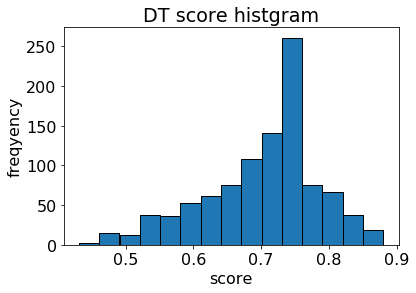

In [13]:
fi_module.dt_score(X_monk, y_monk, 10)

In [86]:
I_rf, I_basis, I_freq, I_score, I_ucb = fi_module.ex(X_monk, y_monk, 50, "c", 100, 0.3, 0)

------------------------------
rf's feature importance
X1  : 0.11713
X2  : 0.15772
X3  : 0.01519
X4  : 0.02749
X5  : 0.66677
X6  : 0.0157
------------------------------
I_basis's feature importance
X1  : 0.18573
X2  : 0.18425
X3  : 0.1206
X4  : 0.14418
X5  : 0.23039
X6  : 0.13484
------------------------------
I_freq's feature importance
X1  : 0.20266
X2  : 0.18271
X3  : 0.06514
X4  : 0.10271
X5  : 0.36631
X6  : 0.08046
------------------------------
I_score's feature importance
X1  : 0.18534
X2  : 0.18423
X3  : 0.12451
X4  : 0.14704
X5  : 0.22079
X6  : 0.13809
------------------------------
I_ucb's feature importance
X1  : 0.22061
X2  : 0.2073
X3  : 0.0525
X4  : 0.1071
X5  : 0.3381
X6  : 0.0744


In [15]:
I_rf, I_basis_a, I_freq_a, I_score_a, I_ucb_a = fi_module.ex(X_monk, y_monk, 50, "c", 100, 0.75, 0.62)

------------------------------
rf's feature importance
X1  : 0.11713
X2  : 0.15772
X3  : 0.01519
X4  : 0.02749
X5  : 0.66677
X6  : 0.0157
------------------------------
I_basis's feature importance
X1  : 0.18636
X2  : 0.18281
X3  : 0.11923
X4  : 0.14351
X5  : 0.23872
X6  : 0.12937
------------------------------
I_freq's feature importance
X1  : 0.20295
X2  : 0.17913
X3  : 0.0641
X4  : 0.10804
X5  : 0.36944
X6  : 0.07634
------------------------------
I_score's feature importance
X1  : 0.18539
X2  : 0.18221
X3  : 0.12509
X4  : 0.14745
X5  : 0.22523
X6  : 0.13463
------------------------------
I_ucb's feature importance
X1  : 0.2278
X2  : 0.20932
X3  : 0.03611
X4  : 0.10257
X5  : 0.37118
X6  : 0.05302


['X1', 'X2', 'X3', 'X4', 'X5', 'X6']


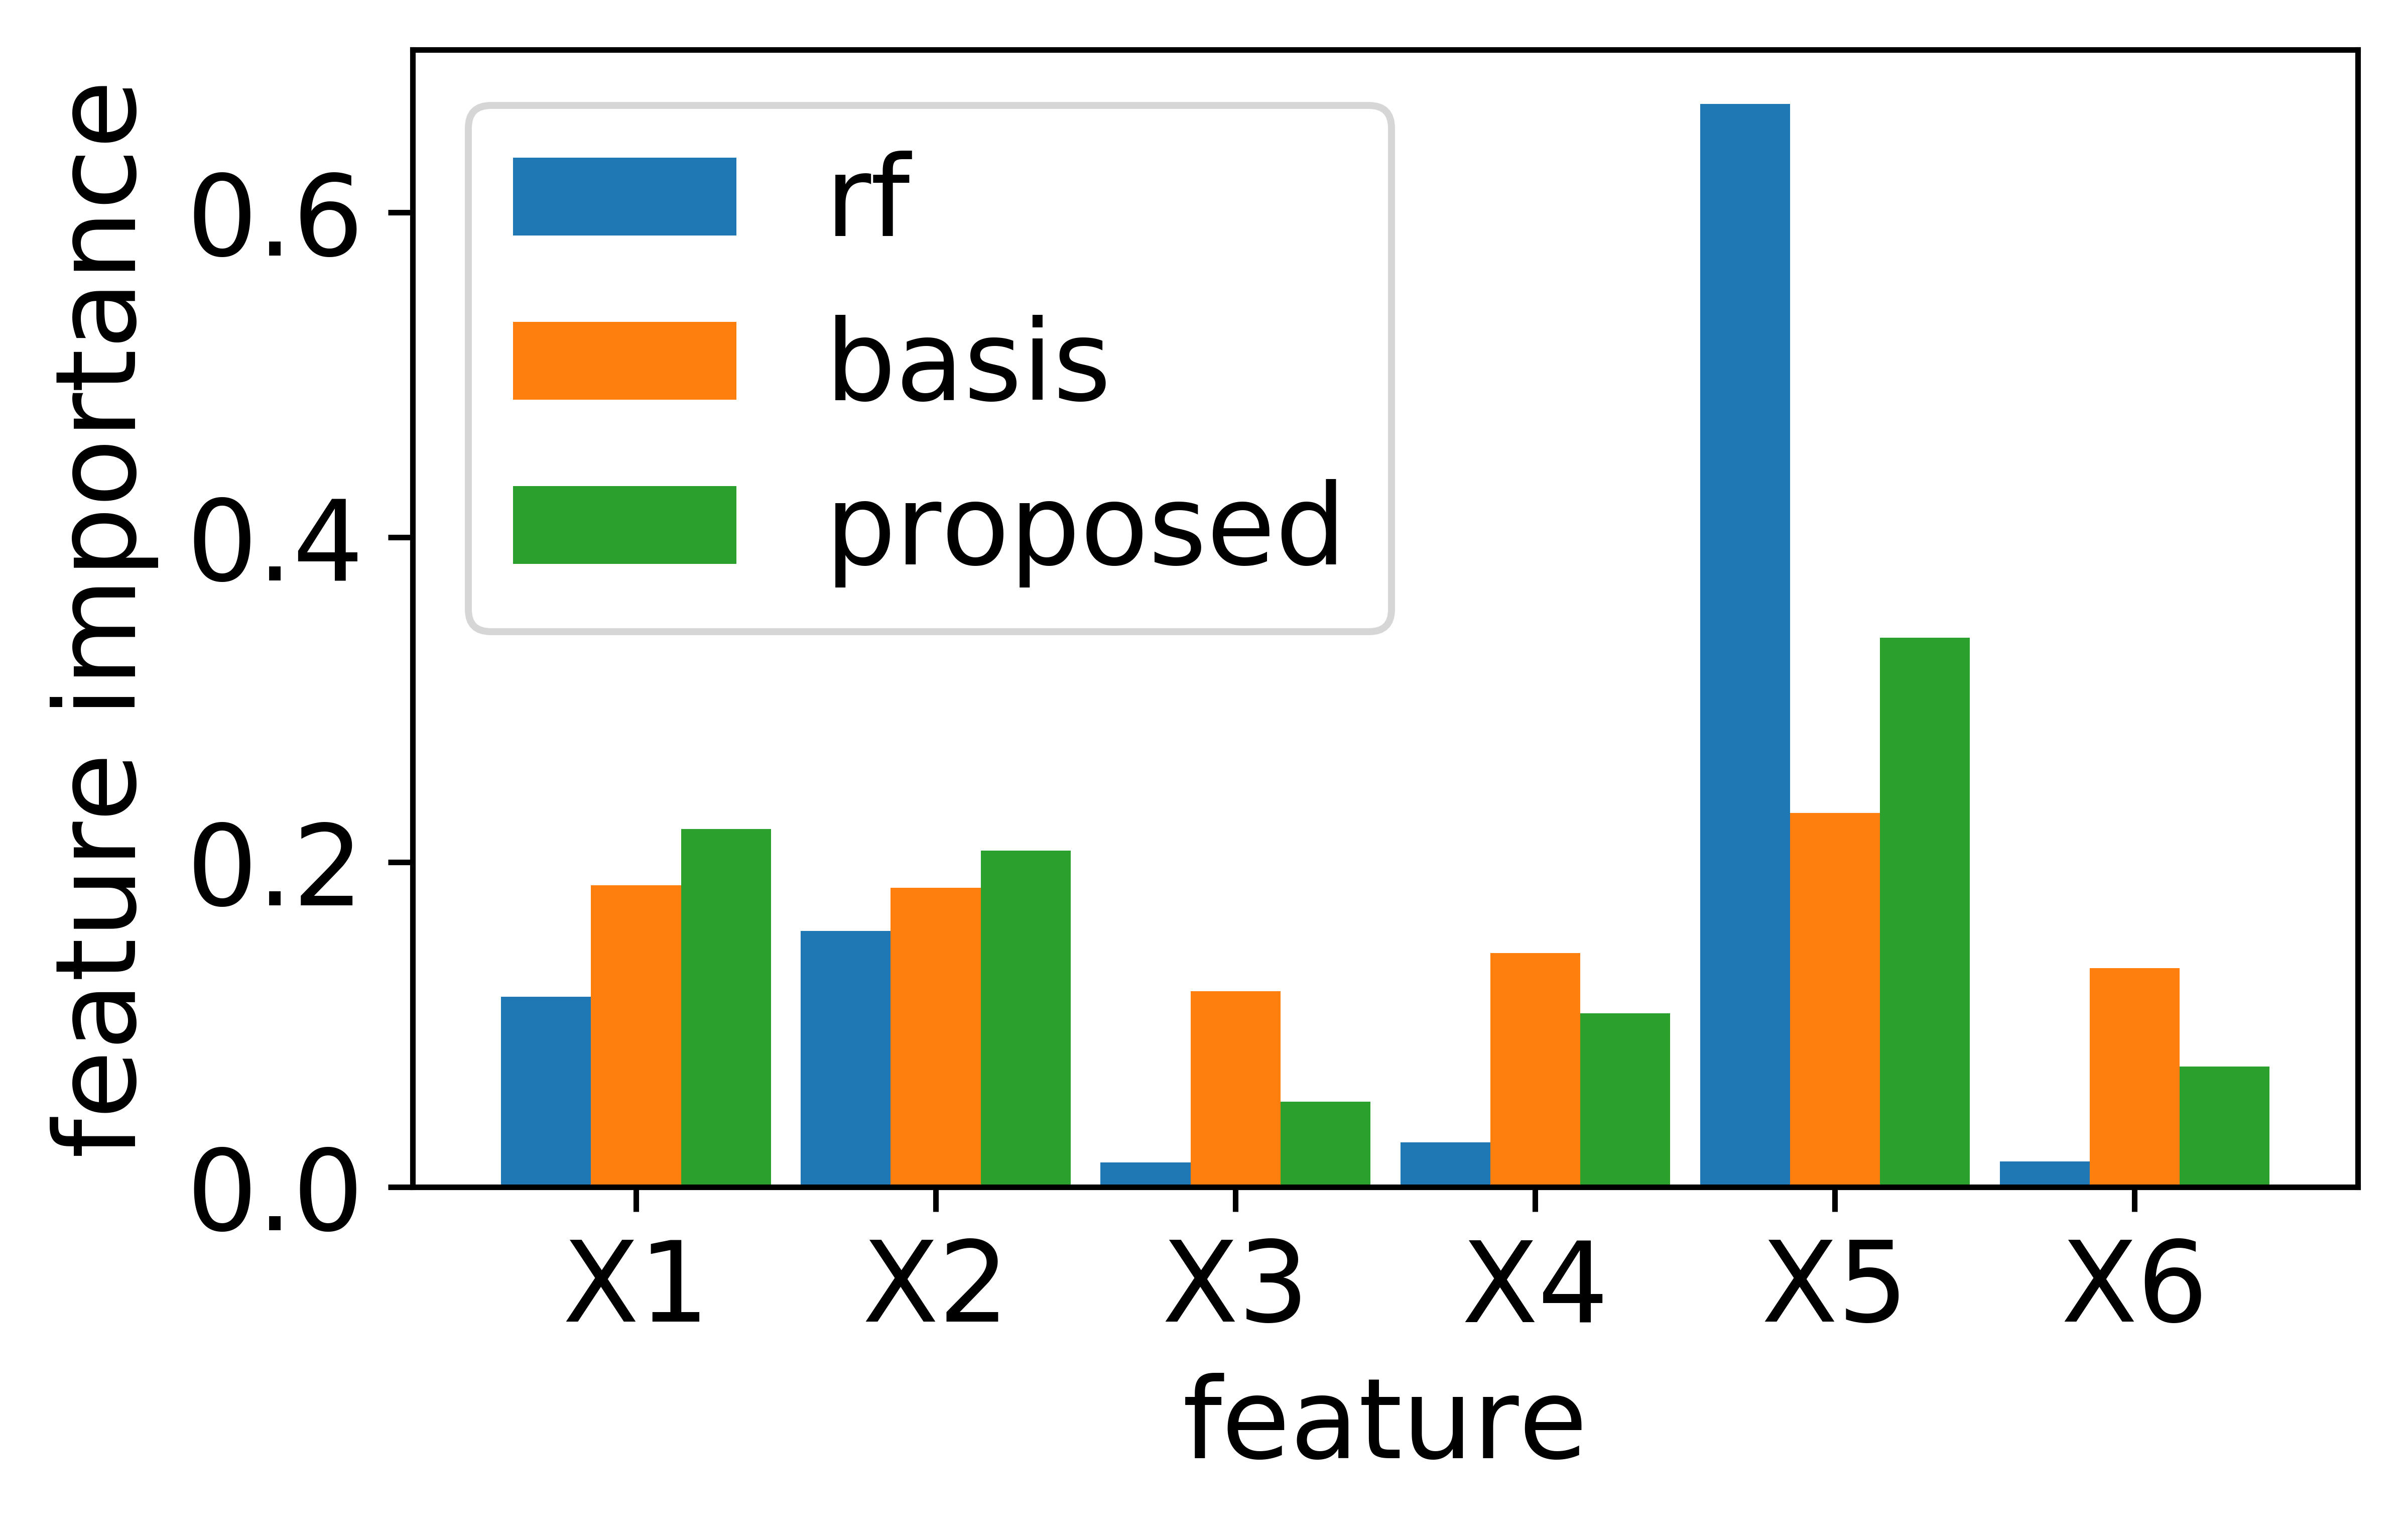

In [16]:
left = np.arange(len(I_rf))
label = ["X1", "X2", "X3", "X4", "X5", "X6"]
width = 0.3
plt.rcParams["font.size"] = 16
plt.figure(figsize=(5, 3), dpi=1000)
plt.bar(left, I_rf, width=0.3, align="center")
plt.bar(left+width, I_basis,  width=0.3, align="center")
plt.bar(left+(width*2), I_ucb,  width=0.3, align="center")
plt.xticks(left + width, label)
print(label)

plt.legend(["rf", "basis", "proposed"])
plt.xlabel('feature')
plt.ylabel("feature importance")

plt.savefig('monk.pdf', bbox_inches="tight")

['X1', 'X2', 'X3', 'X4', 'X5', 'X6']


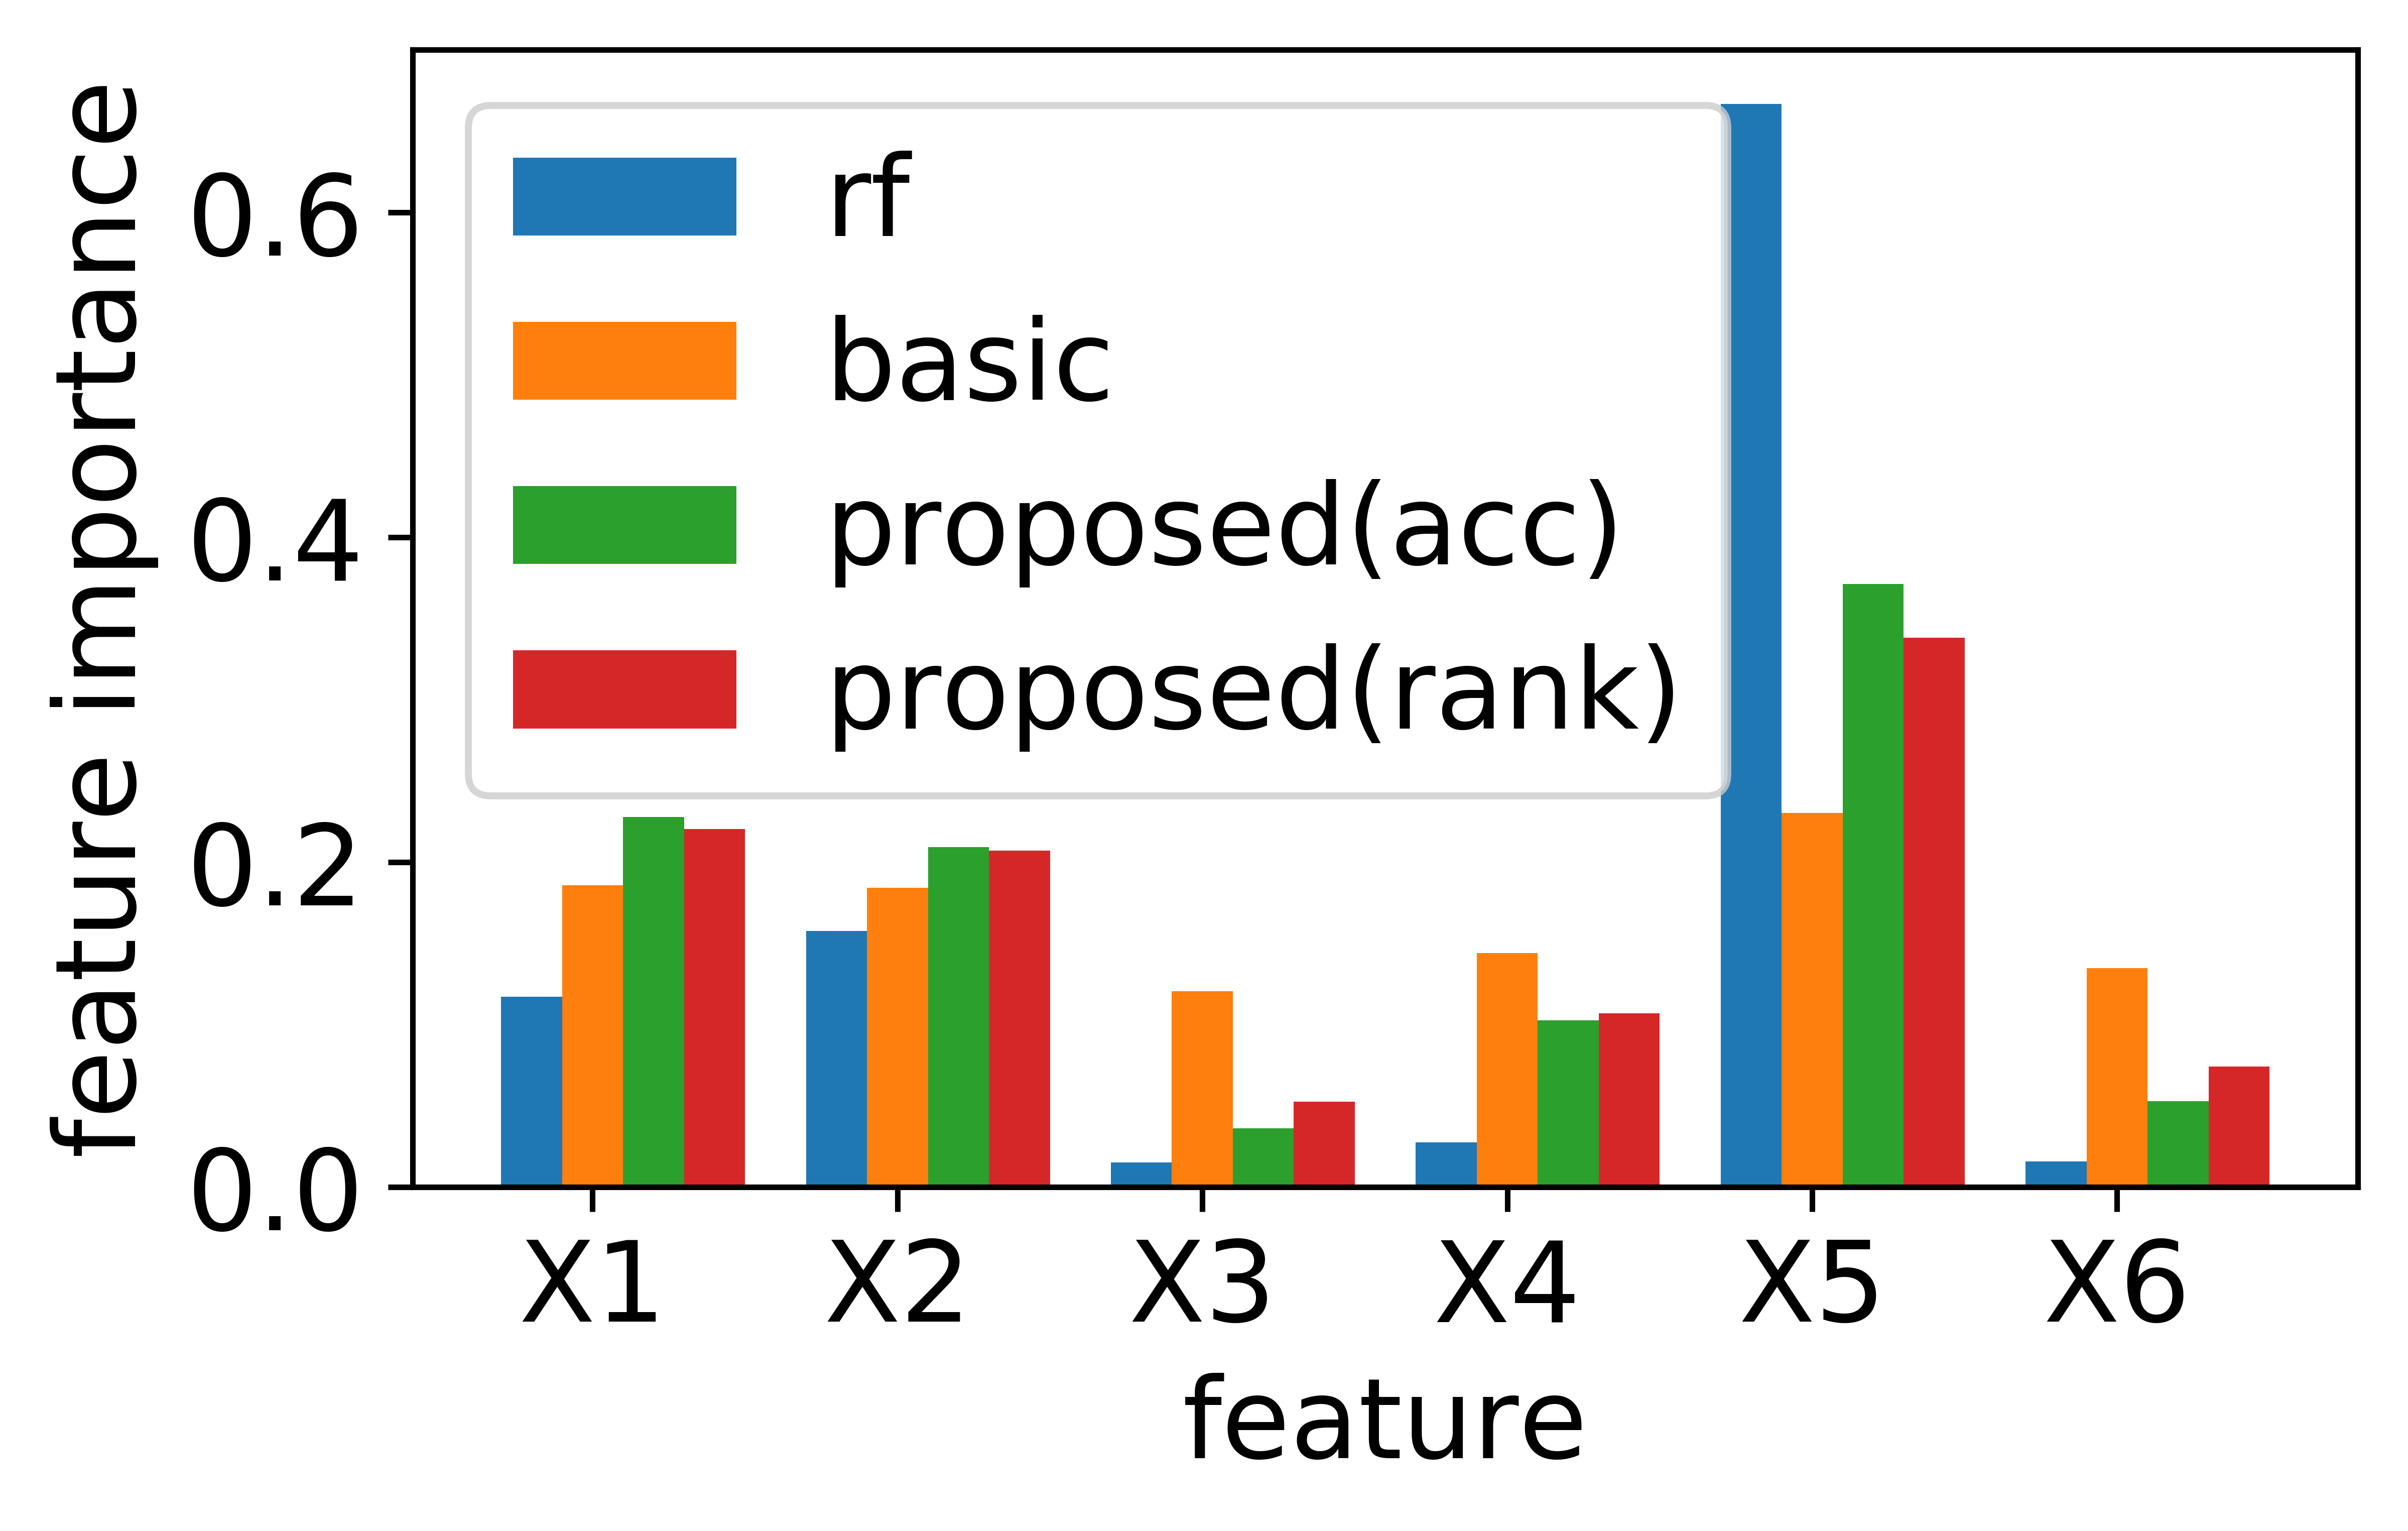

In [32]:
left = np.arange(len(I_rf))
label = ["X1", "X2", "X3", "X4", "X5", "X6"]
width = 0.2
plt.rcParams["font.size"] = 16
plt.figure(figsize=(5, 3), dpi=1000)
plt.bar(left, I_rf, width=0.2, align="center")
plt.bar(left+width, I_basis,  width=0.2, align="center")
plt.bar(left+(width*2), I_ucb_a,  width=0.2, align="center")
plt.bar(left+(width*3), I_ucb,  width=0.2, align="center")
plt.xticks(left + width, label)
print(label)

plt.legend(["rf", "basic", "proposed(acc)", "proposed(rank)"])
plt.xlabel('feature')
plt.ylabel("feature importance")

plt.savefig('monk.pdf', bbox_inches="tight")

['x1', 'x2', 'x3', 'x4', 'x5', 'x6']


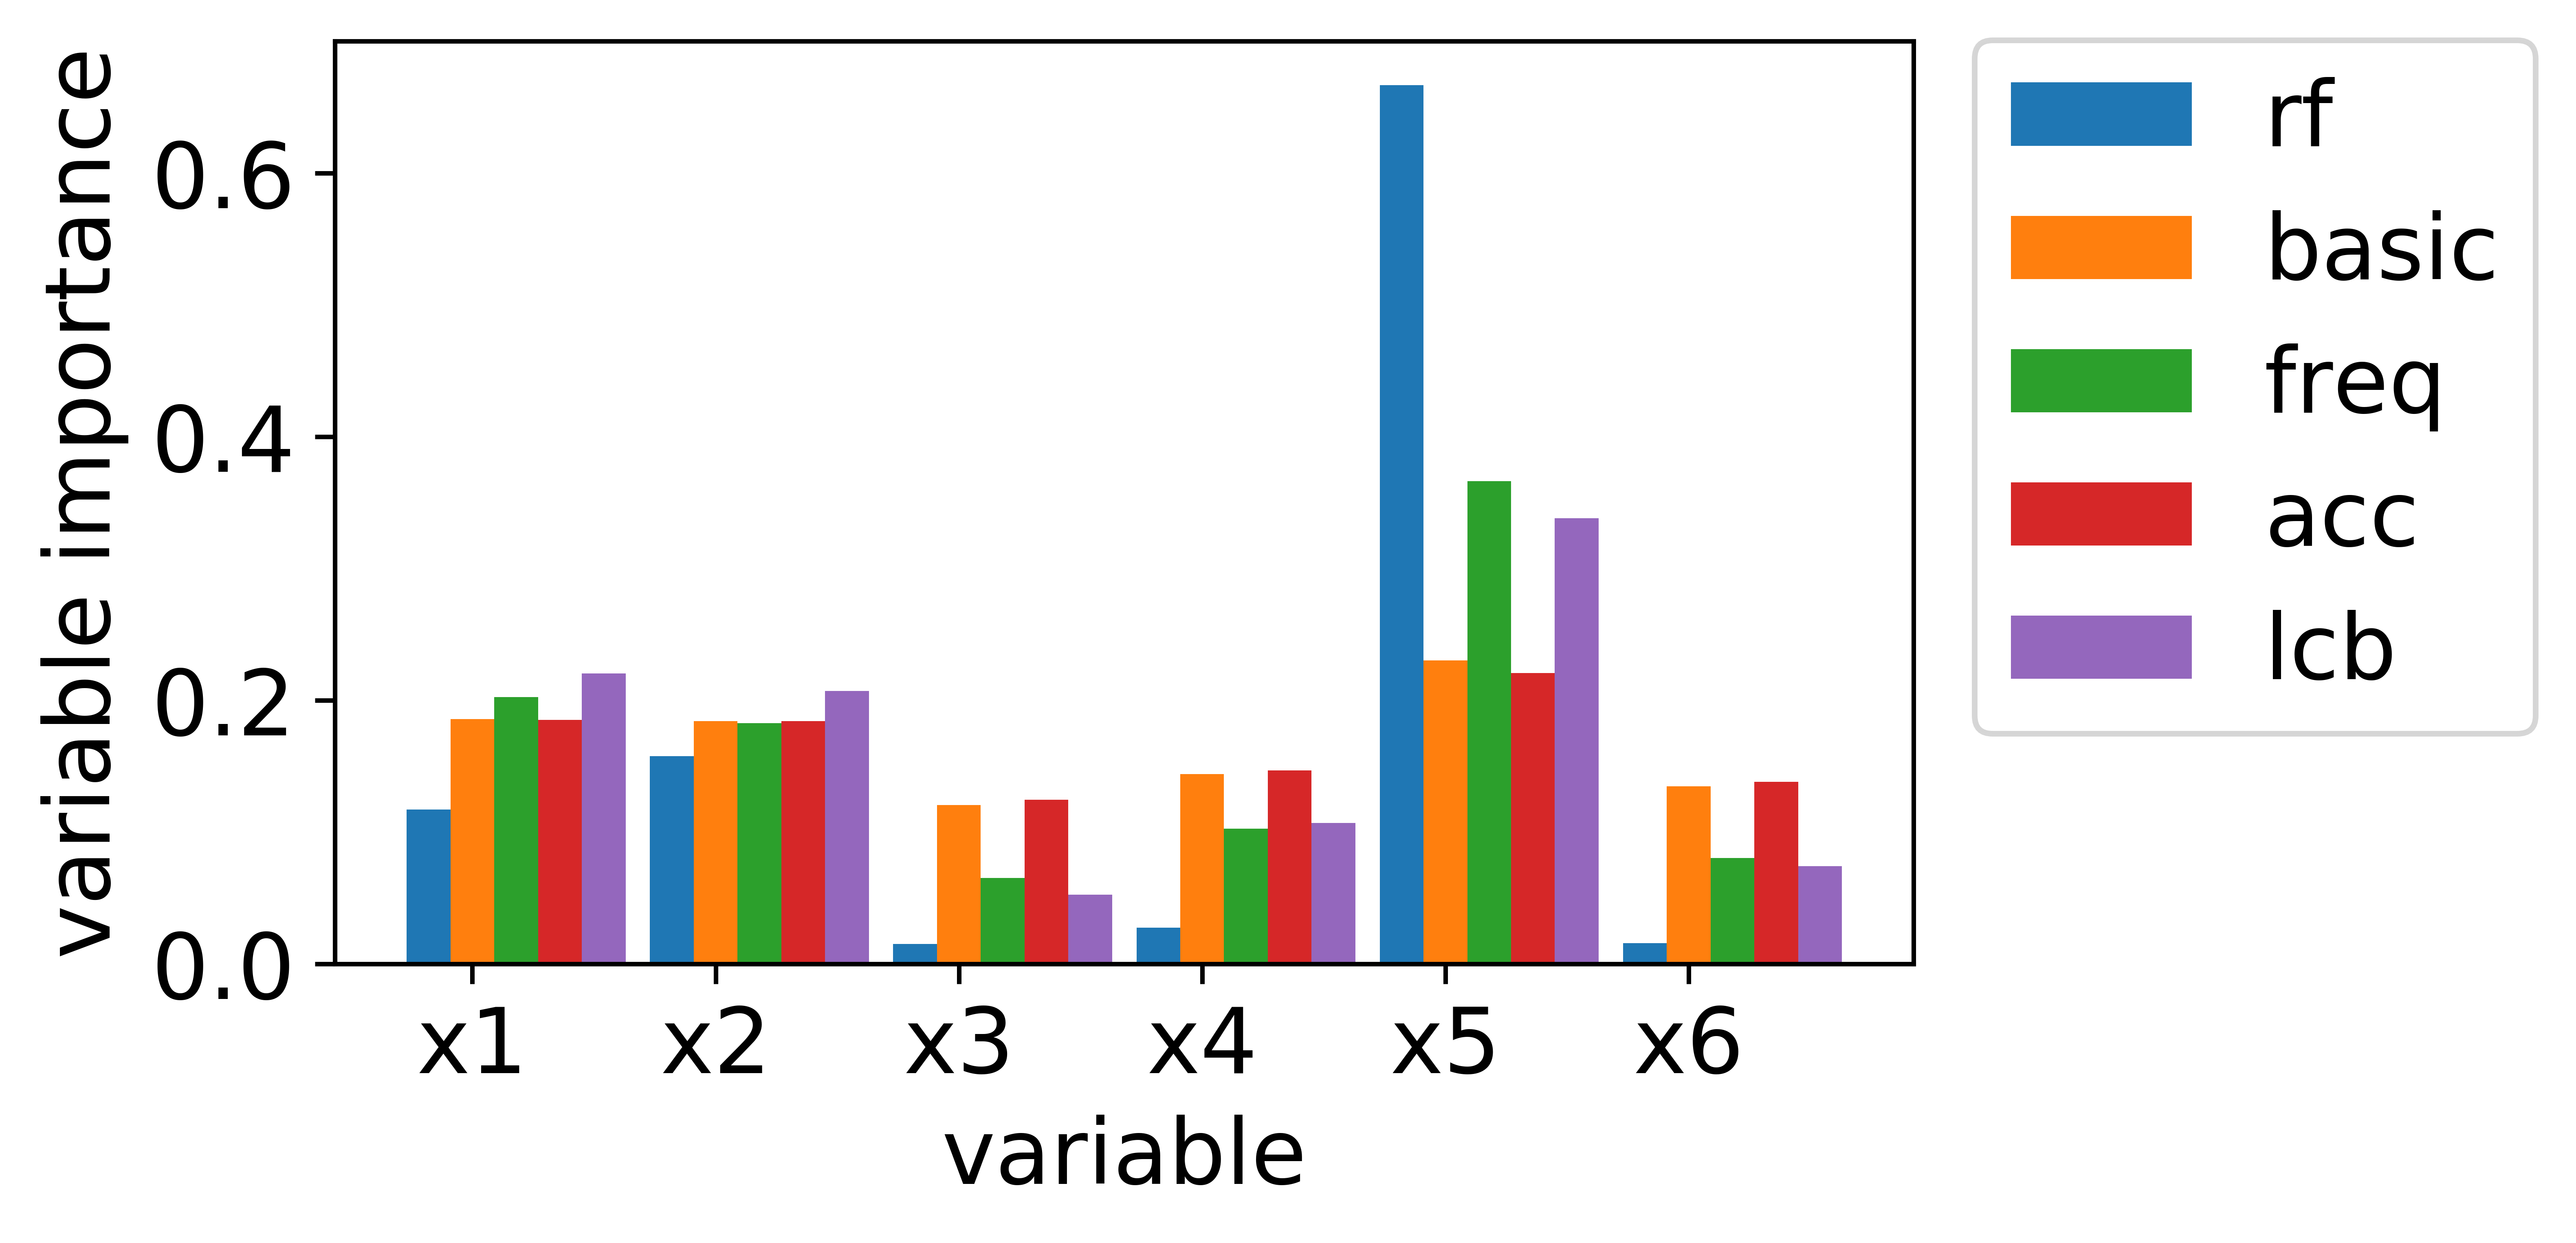

In [87]:
left = np.arange(len(I_rf))
label = ["x1", "x2", "x3", "x4", "x5", "x6"]
width = 0.18
plt.rcParams["font.size"] = 16
plt.figure(figsize=(5, 3), dpi=1000)
plt.bar(left, I_rf, width=width, align="center")
plt.bar(left+width, I_basis,  width=width, align="center")
plt.bar(left+(width*2), I_freq,  width=width, align="center")
plt.bar(left+(width*3), I_score,  width=width, align="center")
plt.bar(left+(width*4), I_ucb,  width=width, align="center")
plt.xticks(left + width, label)
print(label)

plt.legend(["rf", "basic", "freq", "acc", "lcb"], bbox_to_anchor=(1.01, 1.05))
plt.xlabel('variable')
plt.ylabel("variable importance")

plt.savefig('monk1.pdf', bbox_inches="tight")

# wine

In [17]:
from sklearn.datasets import load_wine

wine = load_wine()
#print(wine.DESCR)
X_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
print(X_wine.head())
y_wine = pd.DataFrame(data=wine.target)
y_wine = y_wine.rename(columns={0: 'class'})
print(y_wine.head())
y_wine = y_wine.values.ravel()

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

under 30% score : 0.7592592592592593
over 30% score : 0.9444444444444444


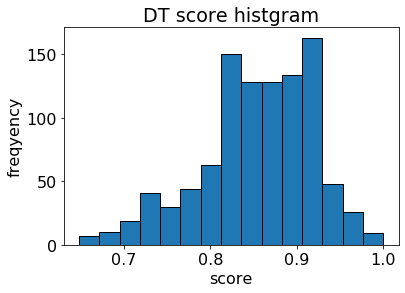

In [18]:
fi_module.dt_score(X_wine, y_wine, 10)

In [19]:
wine_rf, wine_basis, wine_freq, wine_score, wine_ucb = fi_module.ex(X_wine, y_wine, 1, "c", 100, 0.9, 0.82)

------------------------------
rf's feature importance
X1  : 0.10394
X2  : 0.02777
X3  : 0.01244
X4  : 0.04034
X5  : 0.02031
X6  : 0.05428
X7  : 0.1524
X8  : 0.01151
X9  : 0.0185
X10 : 0.18436
X11 : 0.0891
X12 : 0.1273
X13 : 0.15774
------------------------------
I_basis's feature importance
X1  : 0.10568
X2  : 0.07909
X3  : 0.08507
X4  : 0.04204
X5  : 0.07231
X6  : 0.06026
X7  : 0.09604
X8  : 0.04519
X9  : 0.0
X10 : 0.1033
X11 : 0.11569
X12 : 0.09203
X13 : 0.1033
------------------------------
I_freq's feature importance
X1  : 0.17127
X2  : 0.04722
X3  : 0.02902
X4  : 0.01793
X5  : 0.02467
X6  : 0.03084
X7  : 0.13925
X8  : 0.00771
X9  : 0.0
X10 : 0.12335
X11 : 0.15789
X12 : 0.10989
X13 : 0.14097
------------------------------
I_score's feature importance
X1  : 0.10429
X2  : 0.07941
X3  : 0.08523
X4  : 0.04423
X5  : 0.07349
X6  : 0.06139
X7  : 0.09534
X8  : 0.04723
X9  : 0.0
X10 : 0.10351
X11 : 0.11273
X12 : 0.09149
X13 : 0.10166
------------------------------
I_ucb's feature importanc

In [23]:
wine_rf, wine_basis, wine_freq, wine_score, wine_ucb = fi_module.ex(X_wine, y_wine, 50, "c", 100, 0.3, 0)

------------------------------
rf's feature importance
X1  : 0.1094
X2  : 0.02089
X3  : 0.01031
X4  : 0.03358
X5  : 0.01784
X6  : 0.06403
X7  : 0.15277
X8  : 0.01282
X9  : 0.02004
X10 : 0.18544
X11 : 0.07873
X12 : 0.13506
X13 : 0.15909
------------------------------
I_basis's feature importance
X1  : 0.1015
X2  : 0.07493
X3  : 0.05474
X4  : 0.05526
X5  : 0.08703
X6  : 0.06842
X7  : 0.09661
X8  : 0.0447
X9  : 0.05763
X10 : 0.085
X11 : 0.09478
X12 : 0.08252
X13 : 0.0969
------------------------------
I_freq's feature importance
X1  : 0.1426
X2  : 0.03988
X3  : 0.01723
X4  : 0.02749
X5  : 0.05276
X6  : 0.04697
X7  : 0.15371
X8  : 0.01127
X9  : 0.02392
X10 : 0.13213
X11 : 0.10593
X12 : 0.09696
X13 : 0.14916
------------------------------
I_score's feature importance
X1  : 0.09956
X2  : 0.07515
X3  : 0.05603
X4  : 0.05693
X5  : 0.08644
X6  : 0.06936
X7  : 0.09547
X8  : 0.04584
X9  : 0.05874
X10 : 0.08463
X11 : 0.09381
X12 : 0.08245
X13 : 0.09559
------------------------------
I_ucb's featur

0.703703703703703
0.6296296296296297
0.6851851851851859
0.6296296296296297
0.6296296296296297


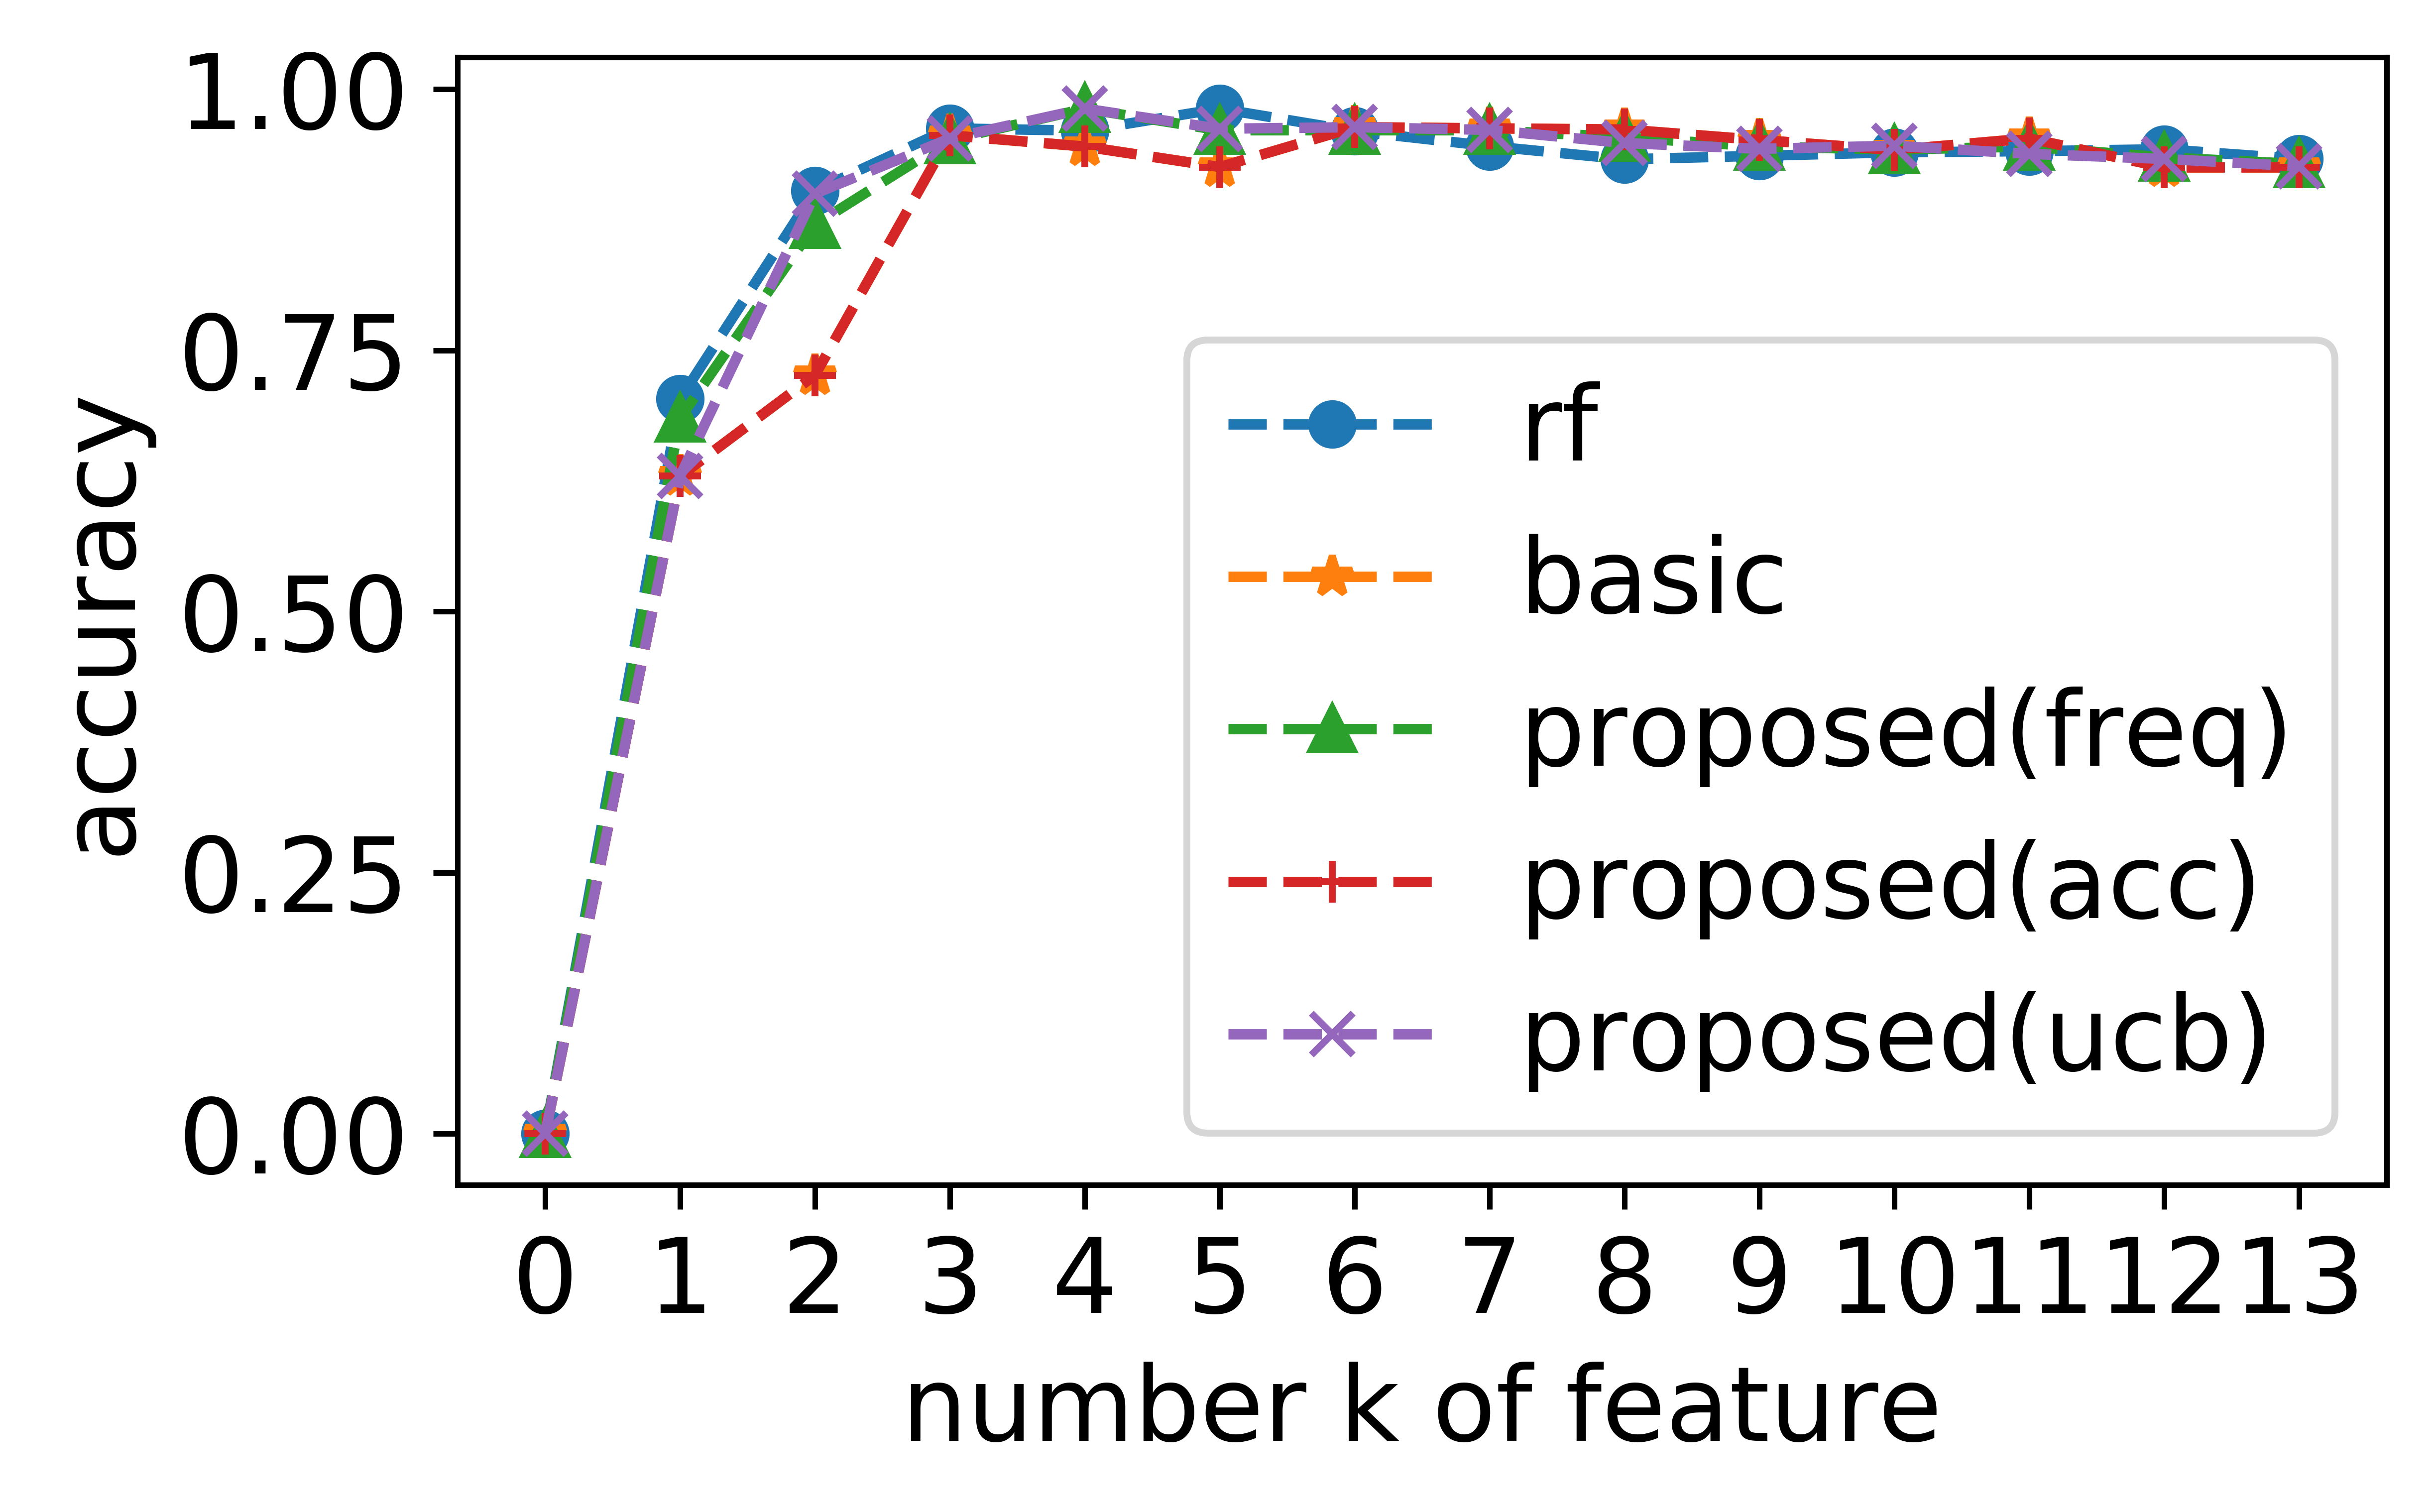

In [77]:
#rf_score = fs(X_xor, y_xor, "c", I_rf)
wine_rf_score = fi_module.fs(X_wine, y_wine, "c", wine_rf)
wine_basis_score = fi_module.fs(X_wine, y_wine, "c", wine_basis)
wine_freq_score = fi_module.fs(X_wine, y_wine, "c", wine_freq)
wine_score_score = fi_module.fs(X_wine, y_wine, "c", wine_score)
wine_ucb_score = fi_module.fs(X_wine, y_wine, "c", wine_ucb)

x = np.arange(len(wine_rf)+1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 3), dpi=1000)
plt.xticks(x)
plt.plot(x, wine_rf_score, marker="o", linestyle = "--")
plt.plot(x, wine_basis_score, marker="*", linestyle = "--")
plt.plot(x, wine_freq_score, marker="^", linestyle = "--")
plt.plot(x, wine_score_score, marker="+", linestyle = "--")
plt.plot(x, wine_ucb_score, marker="x", linestyle = "--")
plt.legend(["rf", "basic", "proposed(freq)", "proposed(acc)" , "proposed(ucb)"])

plt.xlabel('number k of feature')
plt.ylabel("accuracy")
plt.savefig('wine.pdf', bbox_inches="tight")

In [19]:
wine_rf, wine_basis, wine_freq, wine_score, wine_ucb = fi_module.ex(X_wine, y_wine, 1, "c", 100, 0.3, 0)

------------------------------
rf's feature importance
X1  : 0.10394
X2  : 0.02777
X3  : 0.01244
X4  : 0.04034
X5  : 0.02031
X6  : 0.05428
X7  : 0.1524
X8  : 0.01151
X9  : 0.0185
X10 : 0.18436
X11 : 0.0891
X12 : 0.1273
X13 : 0.15774
------------------------------
I_basis's feature importance
X1  : 0.11172
X2  : 0.09217
X3  : 0.05672
X4  : 0.05821
X5  : 0.07374
X6  : 0.06145
X7  : 0.10055
X8  : 0.04096
X9  : 0.0
X10 : 0.08641
X11 : 0.11607
X12 : 0.09831
X13 : 0.10369
------------------------------
I_freq's feature importance
X1  : 0.1744
X2  : 0.05755
X3  : 0.01771
X4  : 0.02726
X5  : 0.02302
X6  : 0.02878
X7  : 0.14126
X8  : 0.00639
X9  : 0.0
X10 : 0.10117
X11 : 0.154
X12 : 0.12278
X13 : 0.14568
------------------------------
I_score's feature importance
X1  : 0.11023
X2  : 0.09188
X3  : 0.05763
X4  : 0.06034
X5  : 0.07482
X6  : 0.06271
X7  : 0.09981
X8  : 0.04244
X9  : 0.0
X10 : 0.08694
X11 : 0.11364
X12 : 0.09738
X13 : 0.10219
------------------------------
I_ucb's feature importance

0.703703703703703
0.6296296296296297
0.6851851851851859
0.6296296296296297
0.6296296296296297


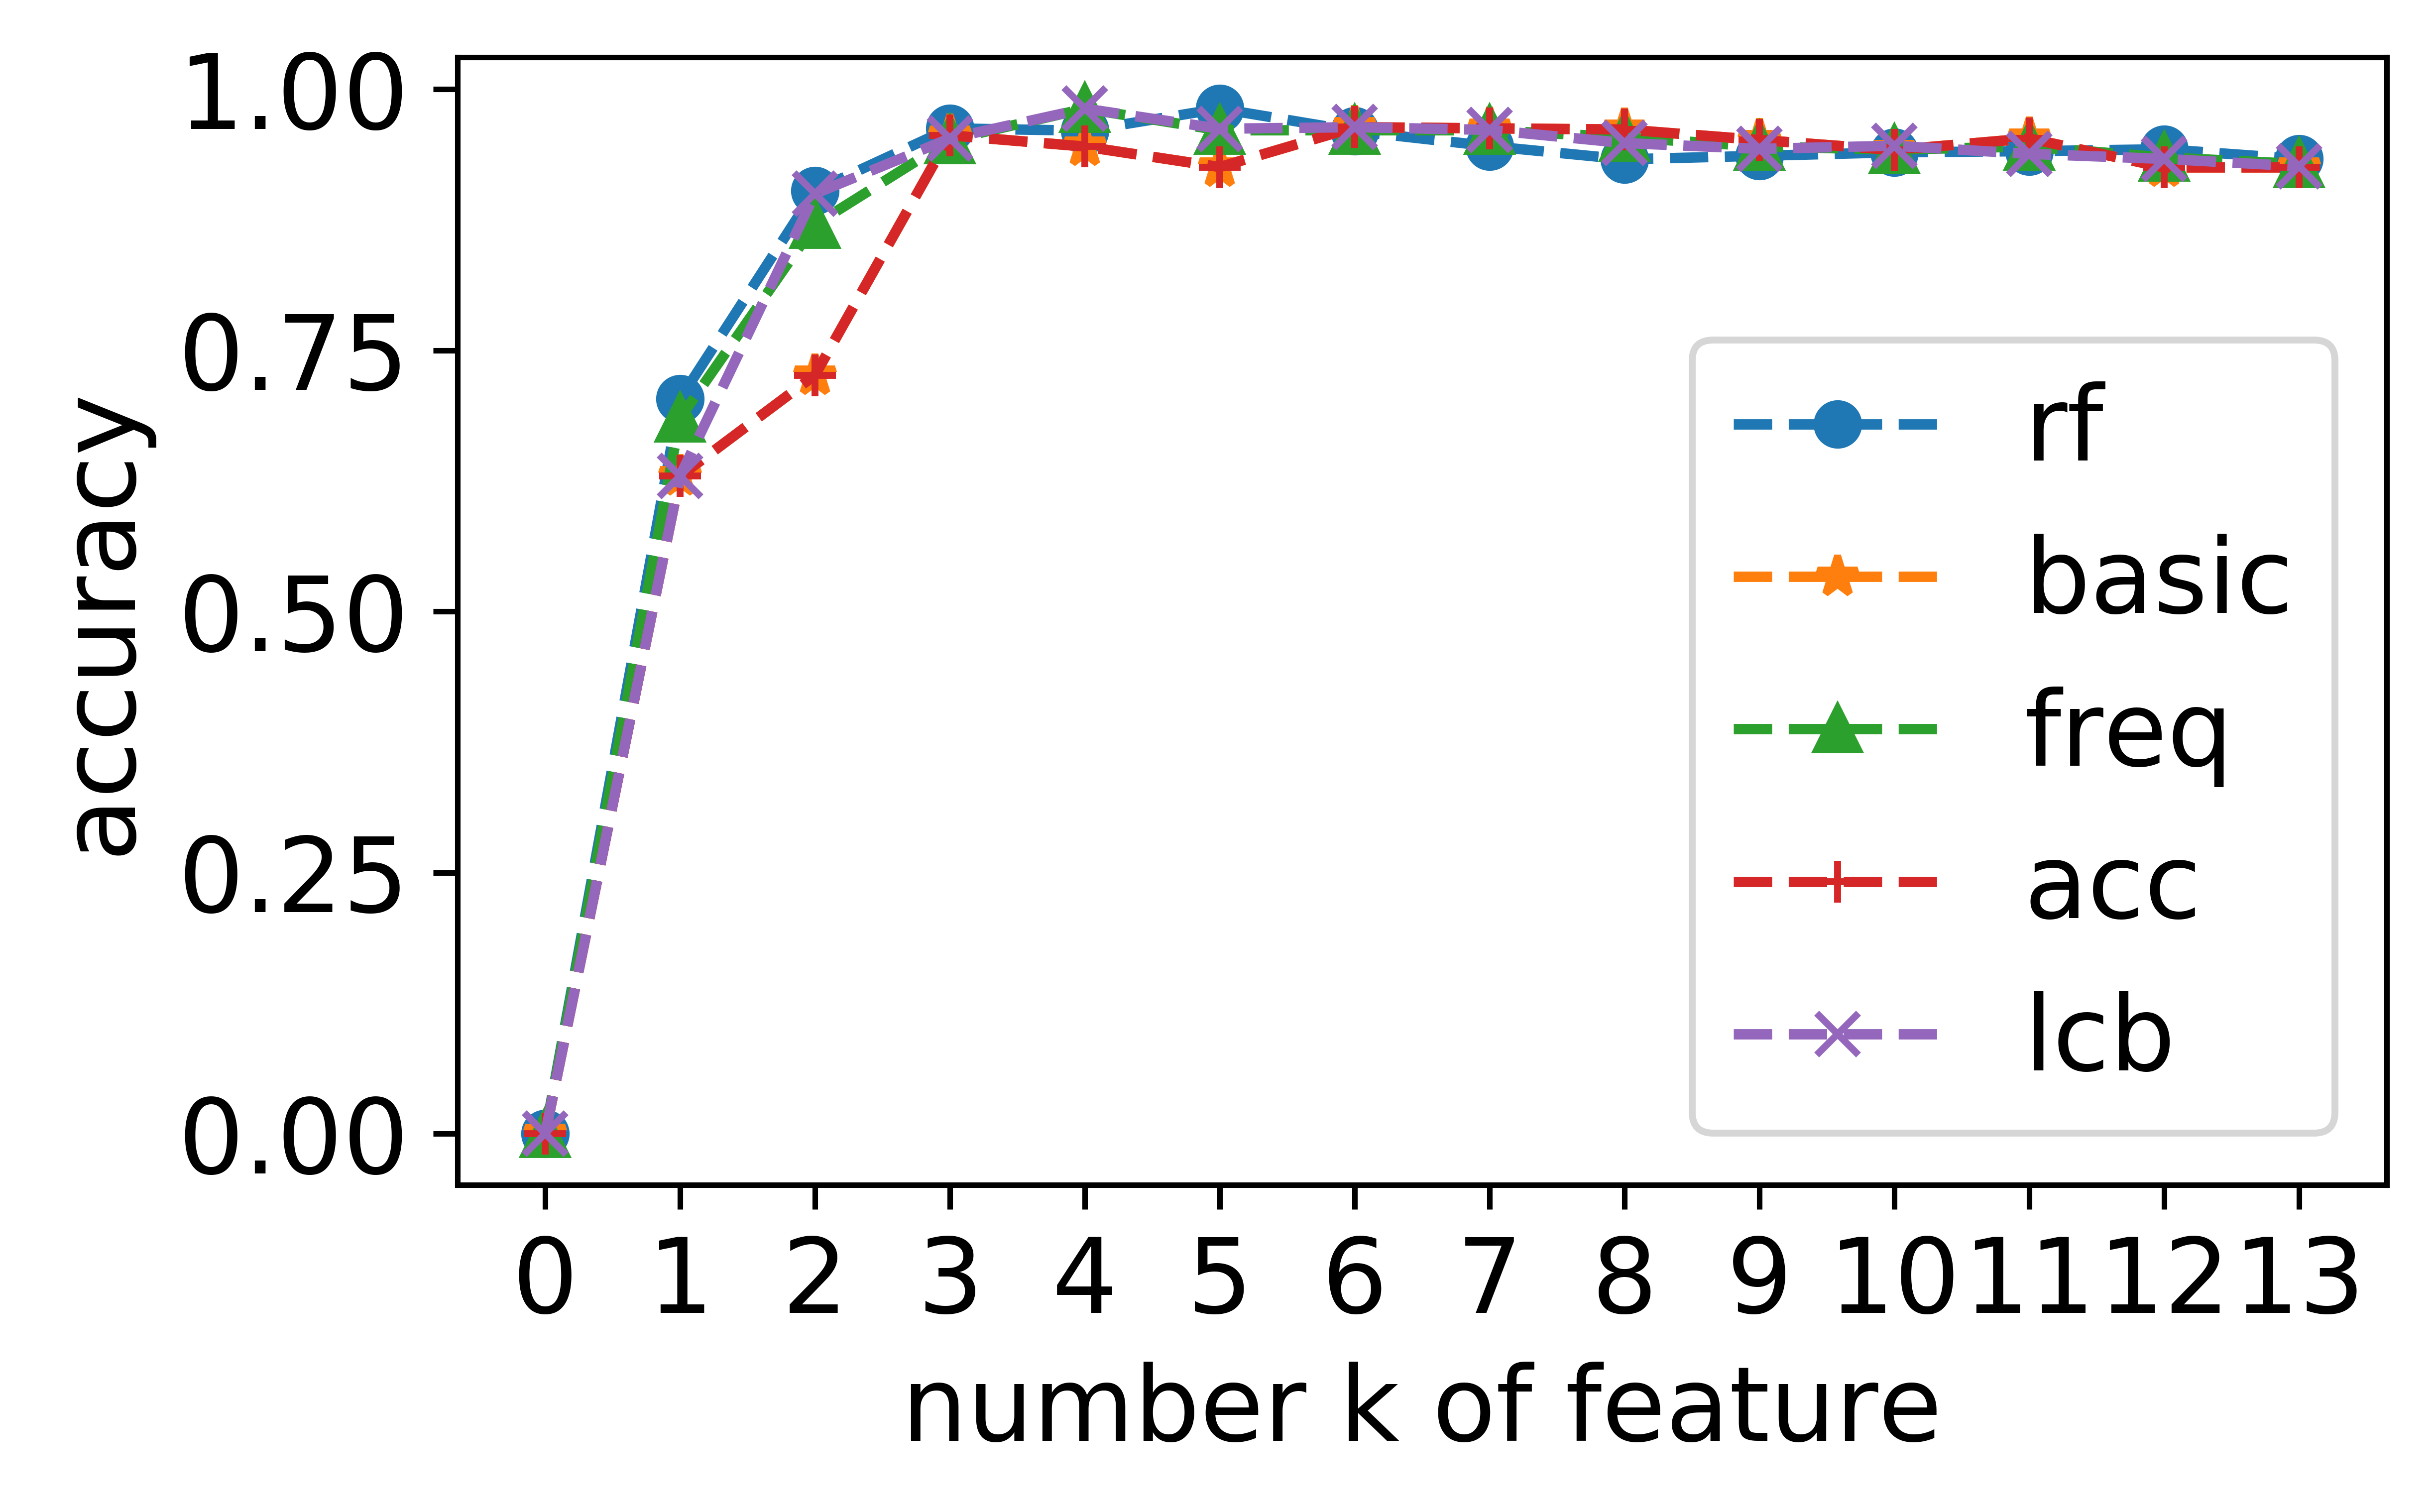

In [78]:
wine_rf_score = fi_module.fs(X_wine, y_wine, "c", wine_rf)
wine_basis_score = fi_module.fs(X_wine, y_wine, "c", wine_basis)
wine_freq_score = fi_module.fs(X_wine, y_wine, "c", wine_freq)
wine_score_score = fi_module.fs(X_wine, y_wine, "c", wine_score)
wine_ucb_score = fi_module.fs(X_wine, y_wine, "c", wine_ucb)

x = np.arange(len(wine_rf)+1)


plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 3), dpi=1000)
plt.xticks(x)
plt.plot(x, wine_rf_score, marker="o", linestyle = "--")
plt.plot(x, wine_basis_score, marker="*", linestyle = "--")
plt.plot(x, wine_freq_score, marker="^", linestyle = "--")
plt.plot(x, wine_score_score, marker="+", linestyle = "--")
plt.plot(x, wine_ucb_score, marker="x", linestyle = "--")
#plt.legend(["$I_{rf}$", "$I_{basic}$", "$I_{freq}$", "$I_{acc}$" , "$I_{ucb}$"])
plt.legend(["rf", "basic", "freq", "acc", "lcb"])

plt.xlabel('number k of feature')
plt.ylabel("accuracy")
plt.savefig('wine.pdf', bbox_inches="tight")

# breast-cancer-wisconsin.data

         0  1  2  3  4  5   6  7  8  9
0  1000025  5  1  1  1  2   1  3  1  1
1  1002945  5  4  4  5  7  10  3  2  1
2  1015425  3  1  1  1  2   2  3  1  1
3  1016277  6  8  8  1  3   4  3  7  1
4  1017023  4  1  1  3  2   1  3  1  1
--------------------------------------------------
0    0
1    0
2    0
3    0
4    0
Name: 10, dtype: int64
under 30% score : 0.9365853658536586
over 30% score : 0.9512195121951219


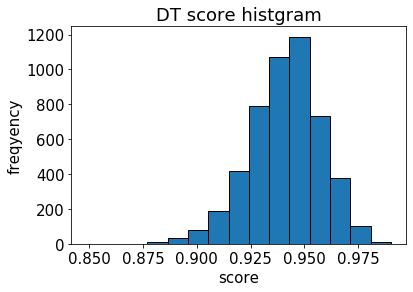

In [25]:
bc_data = pd.read_table('breast-cancer-wisconsin.data', header=None, sep=',')
bc_data.head()
bool_list = bc_data[6] == "?"
bc_drop = bc_data[bool_list]
#print(bc_drop)
bc = bc_data
for i in range(bc_drop.shape[0]):
    bc = bc.drop(index=bc_drop.index[i])
    
X_bc = bc.drop(10, axis=1)
print(X_bc.head(5))
print("-"*50)
y_bc = bc[10]
y_bc = y_bc.replace(2, 0)
y_bc = y_bc.replace(4, 1)
print(y_bc.head(5))
y_bc = y_bc.values.ravel()

fi_module.dt_score(X_bc, y_bc, 50)

In [26]:
bc_rf, bc_basis, bc_freq, bc_score, bc_ucb = fi_module.ex(X_bc, y_bc, 50, "c", 100, 0.3, 0)

------------------------------
rf's feature importance
X1  : 0.00328
X2  : 0.02892
X3  : 0.25611
X4  : 0.2244
X5  : 0.02276
X6  : 0.12782
X7  : 0.15782
X8  : 0.10354
X9  : 0.07294
X10 : 0.0024
------------------------------
I_basis's feature importance
X1  : 0.07157
X2  : 0.1243
X3  : 0.10201
X4  : 0.11063
X5  : 0.09748
X6  : 0.0956
X7  : 0.0991
X8  : 0.10385
X9  : 0.08367
X10 : 0.11178
------------------------------
I_freq's feature importance
X1  : 0.02675
X2  : 0.14004
X3  : 0.14333
X4  : 0.16359
X5  : 0.07082
X6  : 0.09731
X7  : 0.13864
X8  : 0.12178
X9  : 0.06902
X10 : 0.02871
------------------------------
I_score's feature importance
X1  : 0.07192
X2  : 0.12392
X3  : 0.10207
X4  : 0.11047
X5  : 0.09757
X6  : 0.09569
X7  : 0.09915
X8  : 0.1038
X9  : 0.08397
X10 : 0.11144
------------------------------
I_ucb's feature importance
X1  : 0.02021
X2  : 0.15928
X3  : 0.13275
X4  : 0.15074
X5  : 0.08322
X6  : 0.10262
X7  : 0.12724
X8  : 0.1255
X9  : 0.07019
X10 : 0.02825


0.9317073170731708
0.8487804878048785
0.9219512195121952
0.8487804878048785
0.8487804878048785


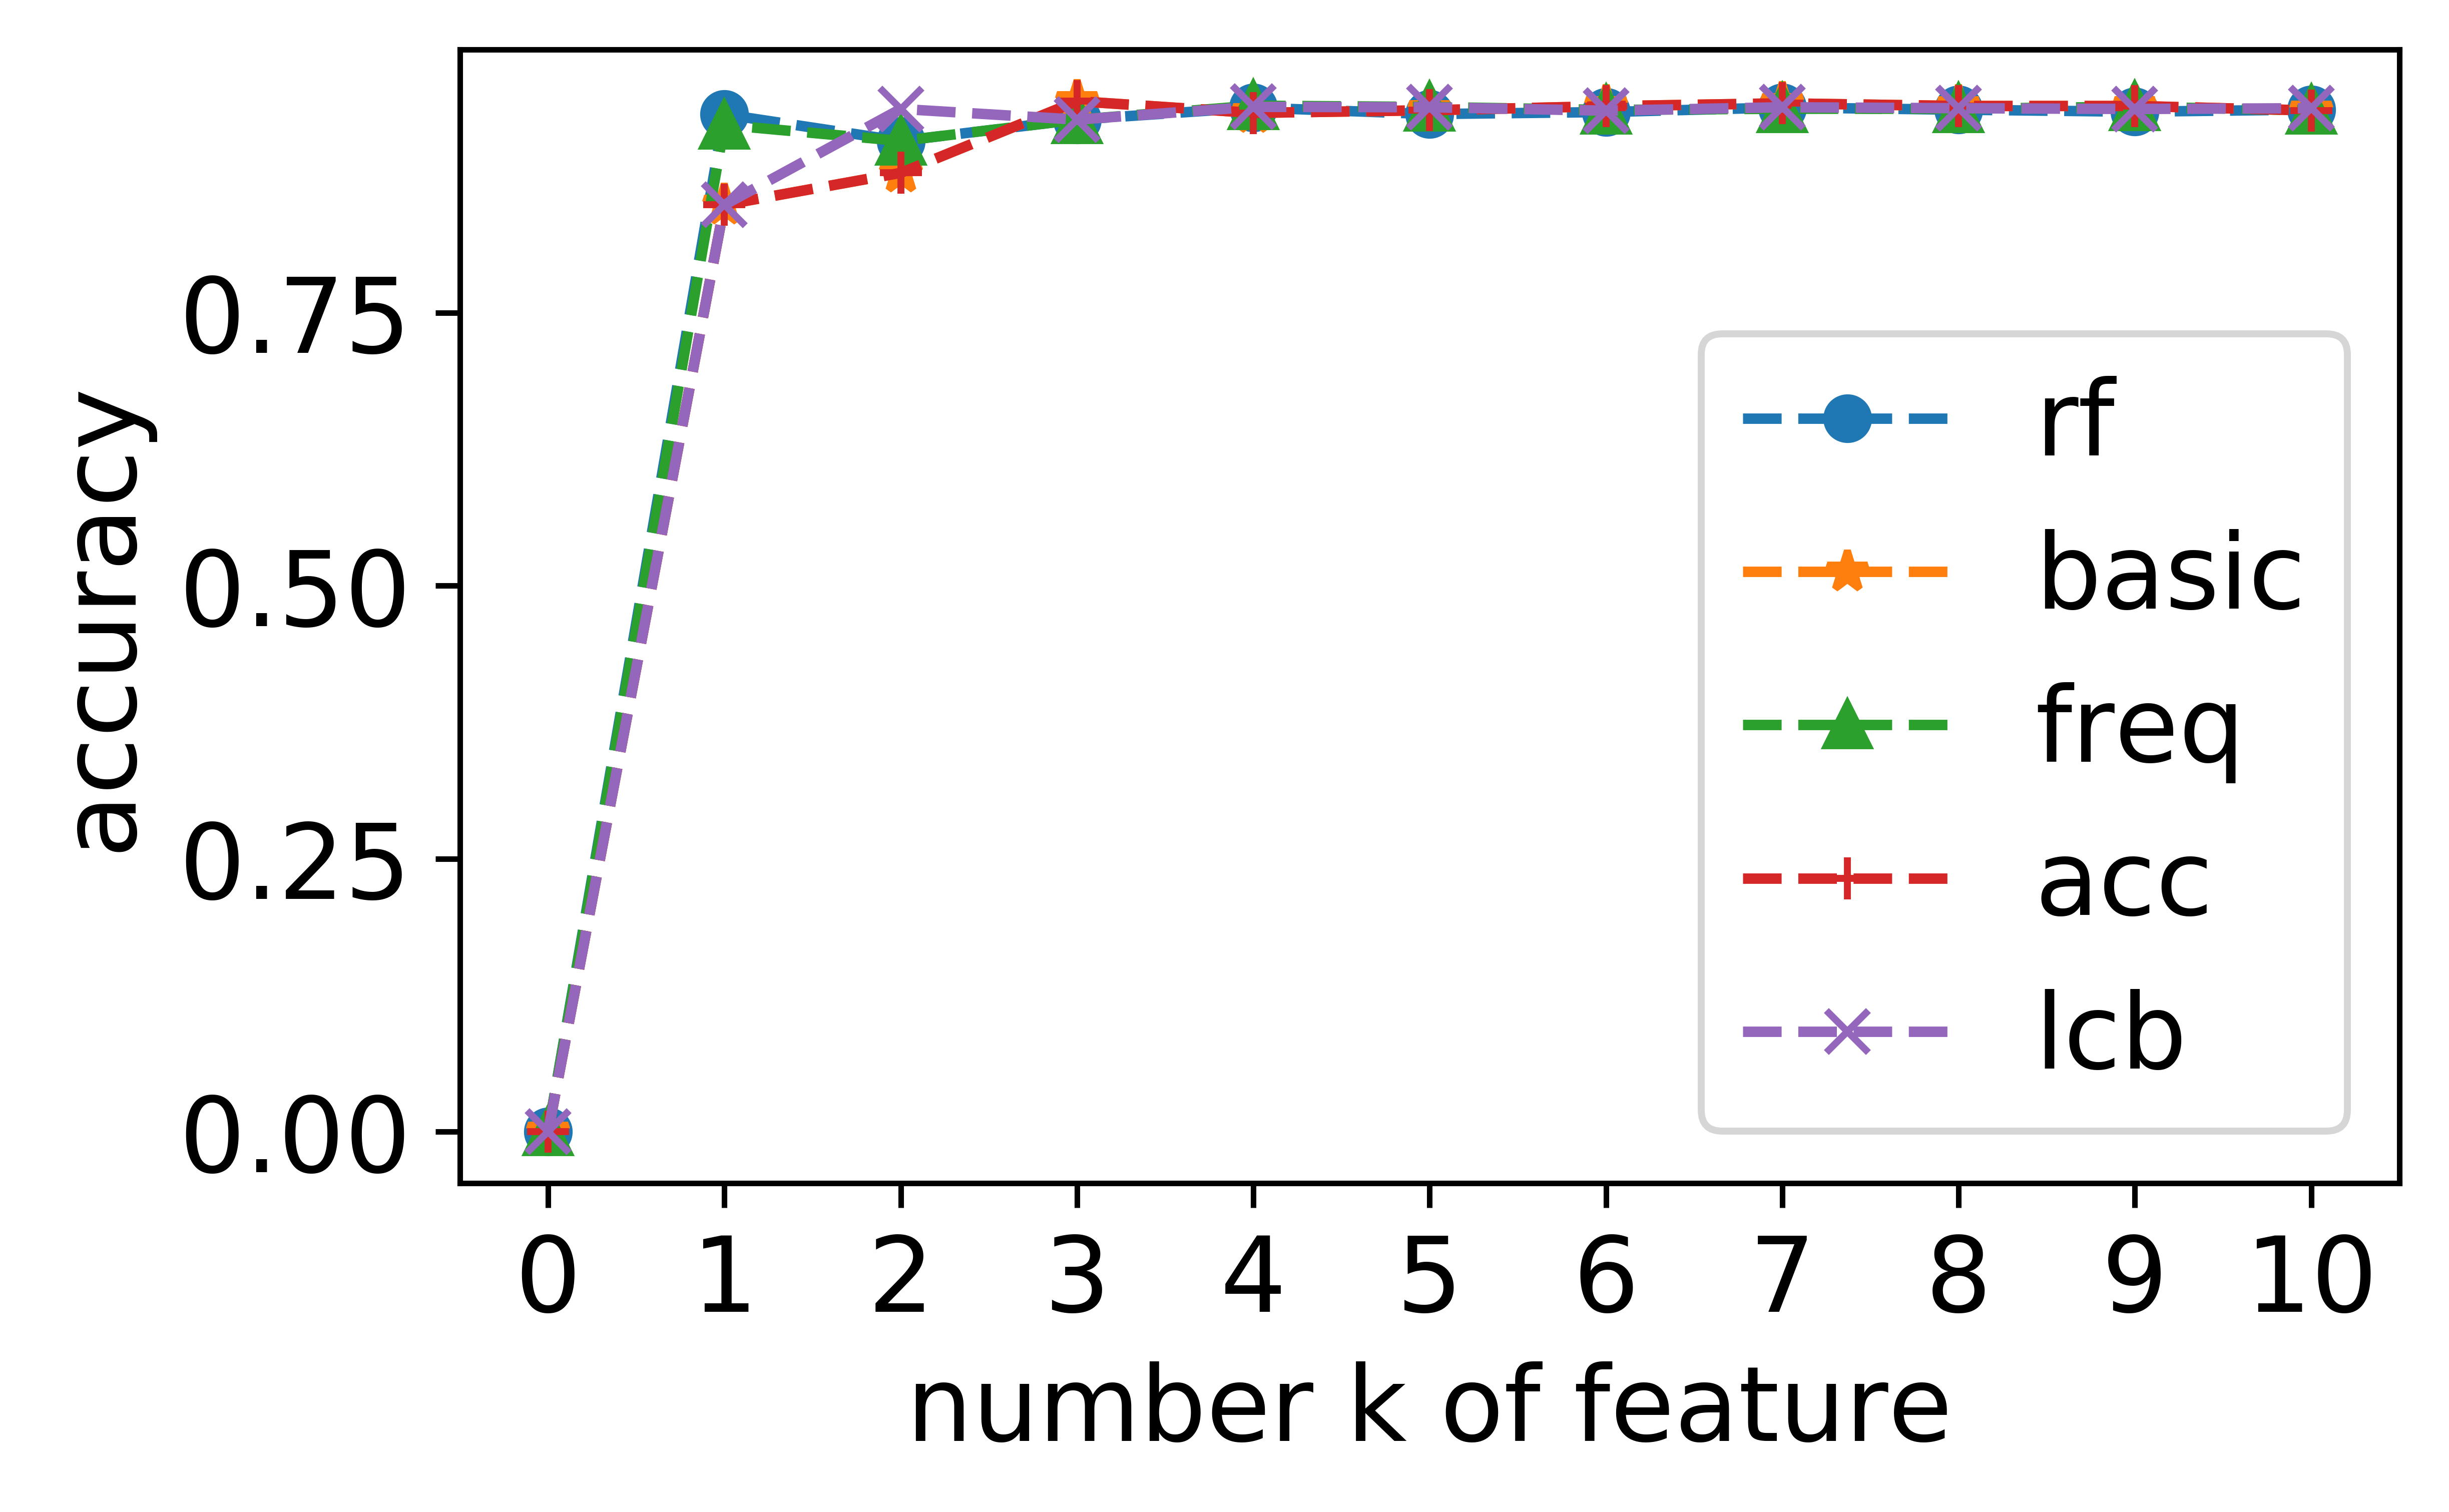

In [79]:
bc_rf_score = fi_module.fs(X_bc, y_bc, "c", bc_rf)
bc_basis_score = fi_module.fs(X_bc, y_bc, "c", bc_basis)
bc_freq_score = fi_module.fs(X_bc, y_bc, "c", bc_freq)
bc_score_score = fi_module.fs(X_bc, y_bc, "c", bc_score)
bc_ucb_score = fi_module.fs(X_bc, y_bc, "c", bc_ucb)

x = np.arange(len(bc_rf_score))

plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 3), dpi=1000)
plt.xticks(x)
plt.plot(x, bc_rf_score, marker="o", linestyle = "--")
plt.plot(x, bc_basis_score, marker="*", linestyle = "--")
plt.plot(x, bc_freq_score, marker="^", linestyle = "--")
plt.plot(x, bc_score_score, marker="+", linestyle = "--")
plt.plot(x, bc_ucb_score, marker="x", linestyle = "--")
#plt.legend(["rf", "basic", "proposed(freq)", "proposed(acc)" , "proposed(ucb)"])
#plt.legend(["$I_{rf}$", "$I_{basic}$", "$I_{freq}$", "$I_{acc}$" , "$I_{ucb}$"])
plt.legend(["rf", "basic", "freq", "acc", "lcb"])

plt.xlabel('number k of feature')
plt.ylabel("accuracy")
plt.savefig('bc.pdf', bbox_inches="tight")

# glass

         1      2     3     4      5     6     7    8     9
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11
--------------------------------------------------
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: 10, dtype: int64
under 30% score : 0.06153846153846154
over 30% score : 0.13846153846153847


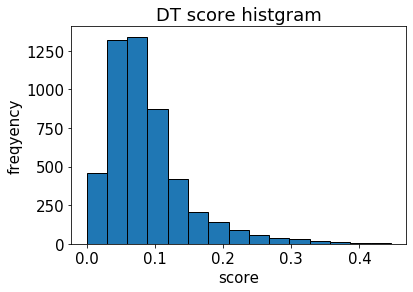

In [28]:
glass = pd.read_table('glass.data', header=None, sep=',')
#glass.head()
X_glass = glass.drop(10, axis=1)
X_glass = X_glass.drop(0, axis=1)
print(X_glass.head(10))
print("-"*50)
y_glass = glass[10]
print(y_glass.head(10))

fi_module.dt_score(X_glass, y_glass, 50)

In [29]:
glass_rf, glass_basis, glass_freq, glass_score, glass_ucb = fi_module.ex(X_glass, y_glass, 50, "c", 100, 0.3, 0)

------------------------------
rf's feature importance
X1  : 0.09169
X2  : 0.08683
X3  : 0.17947
X4  : 0.2177
X5  : 0.03398
X6  : 0.07209
X7  : 0.13235
X8  : 0.18169
X9  : 0.00418
------------------------------
I_basis's feature importance
X1  : 0.09903
X2  : 0.11024
X3  : 0.11211
X4  : 0.10363
X5  : 0.10974
X6  : 0.11024
X7  : 0.12552
X8  : 0.10223
X9  : 0.12726
------------------------------
I_freq's feature importance
X1  : 0.09464
X2  : 0.10737
X3  : 0.15951
X4  : 0.13732
X5  : 0.08276
X6  : 0.1032
X7  : 0.17596
X8  : 0.11719
X9  : 0.02206
------------------------------
I_score's feature importance
X1  : 0.10711
X2  : 0.11254
X3  : 0.11282
X4  : 0.10746
X5  : 0.11182
X6  : 0.11295
X7  : 0.11772
X8  : 0.10819
X9  : 0.10939
------------------------------
I_ucb's feature importance
X1  : 0.09831
X2  : 0.11709
X3  : 0.14406
X4  : 0.12492
X5  : 0.09743
X6  : 0.11468
X7  : 0.16665
X8  : 0.11501
X9  : 0.02186


0.5076923076923083
0.2923076923076926
0.4461538461538458
0.4461538461538458
0.4461538461538458


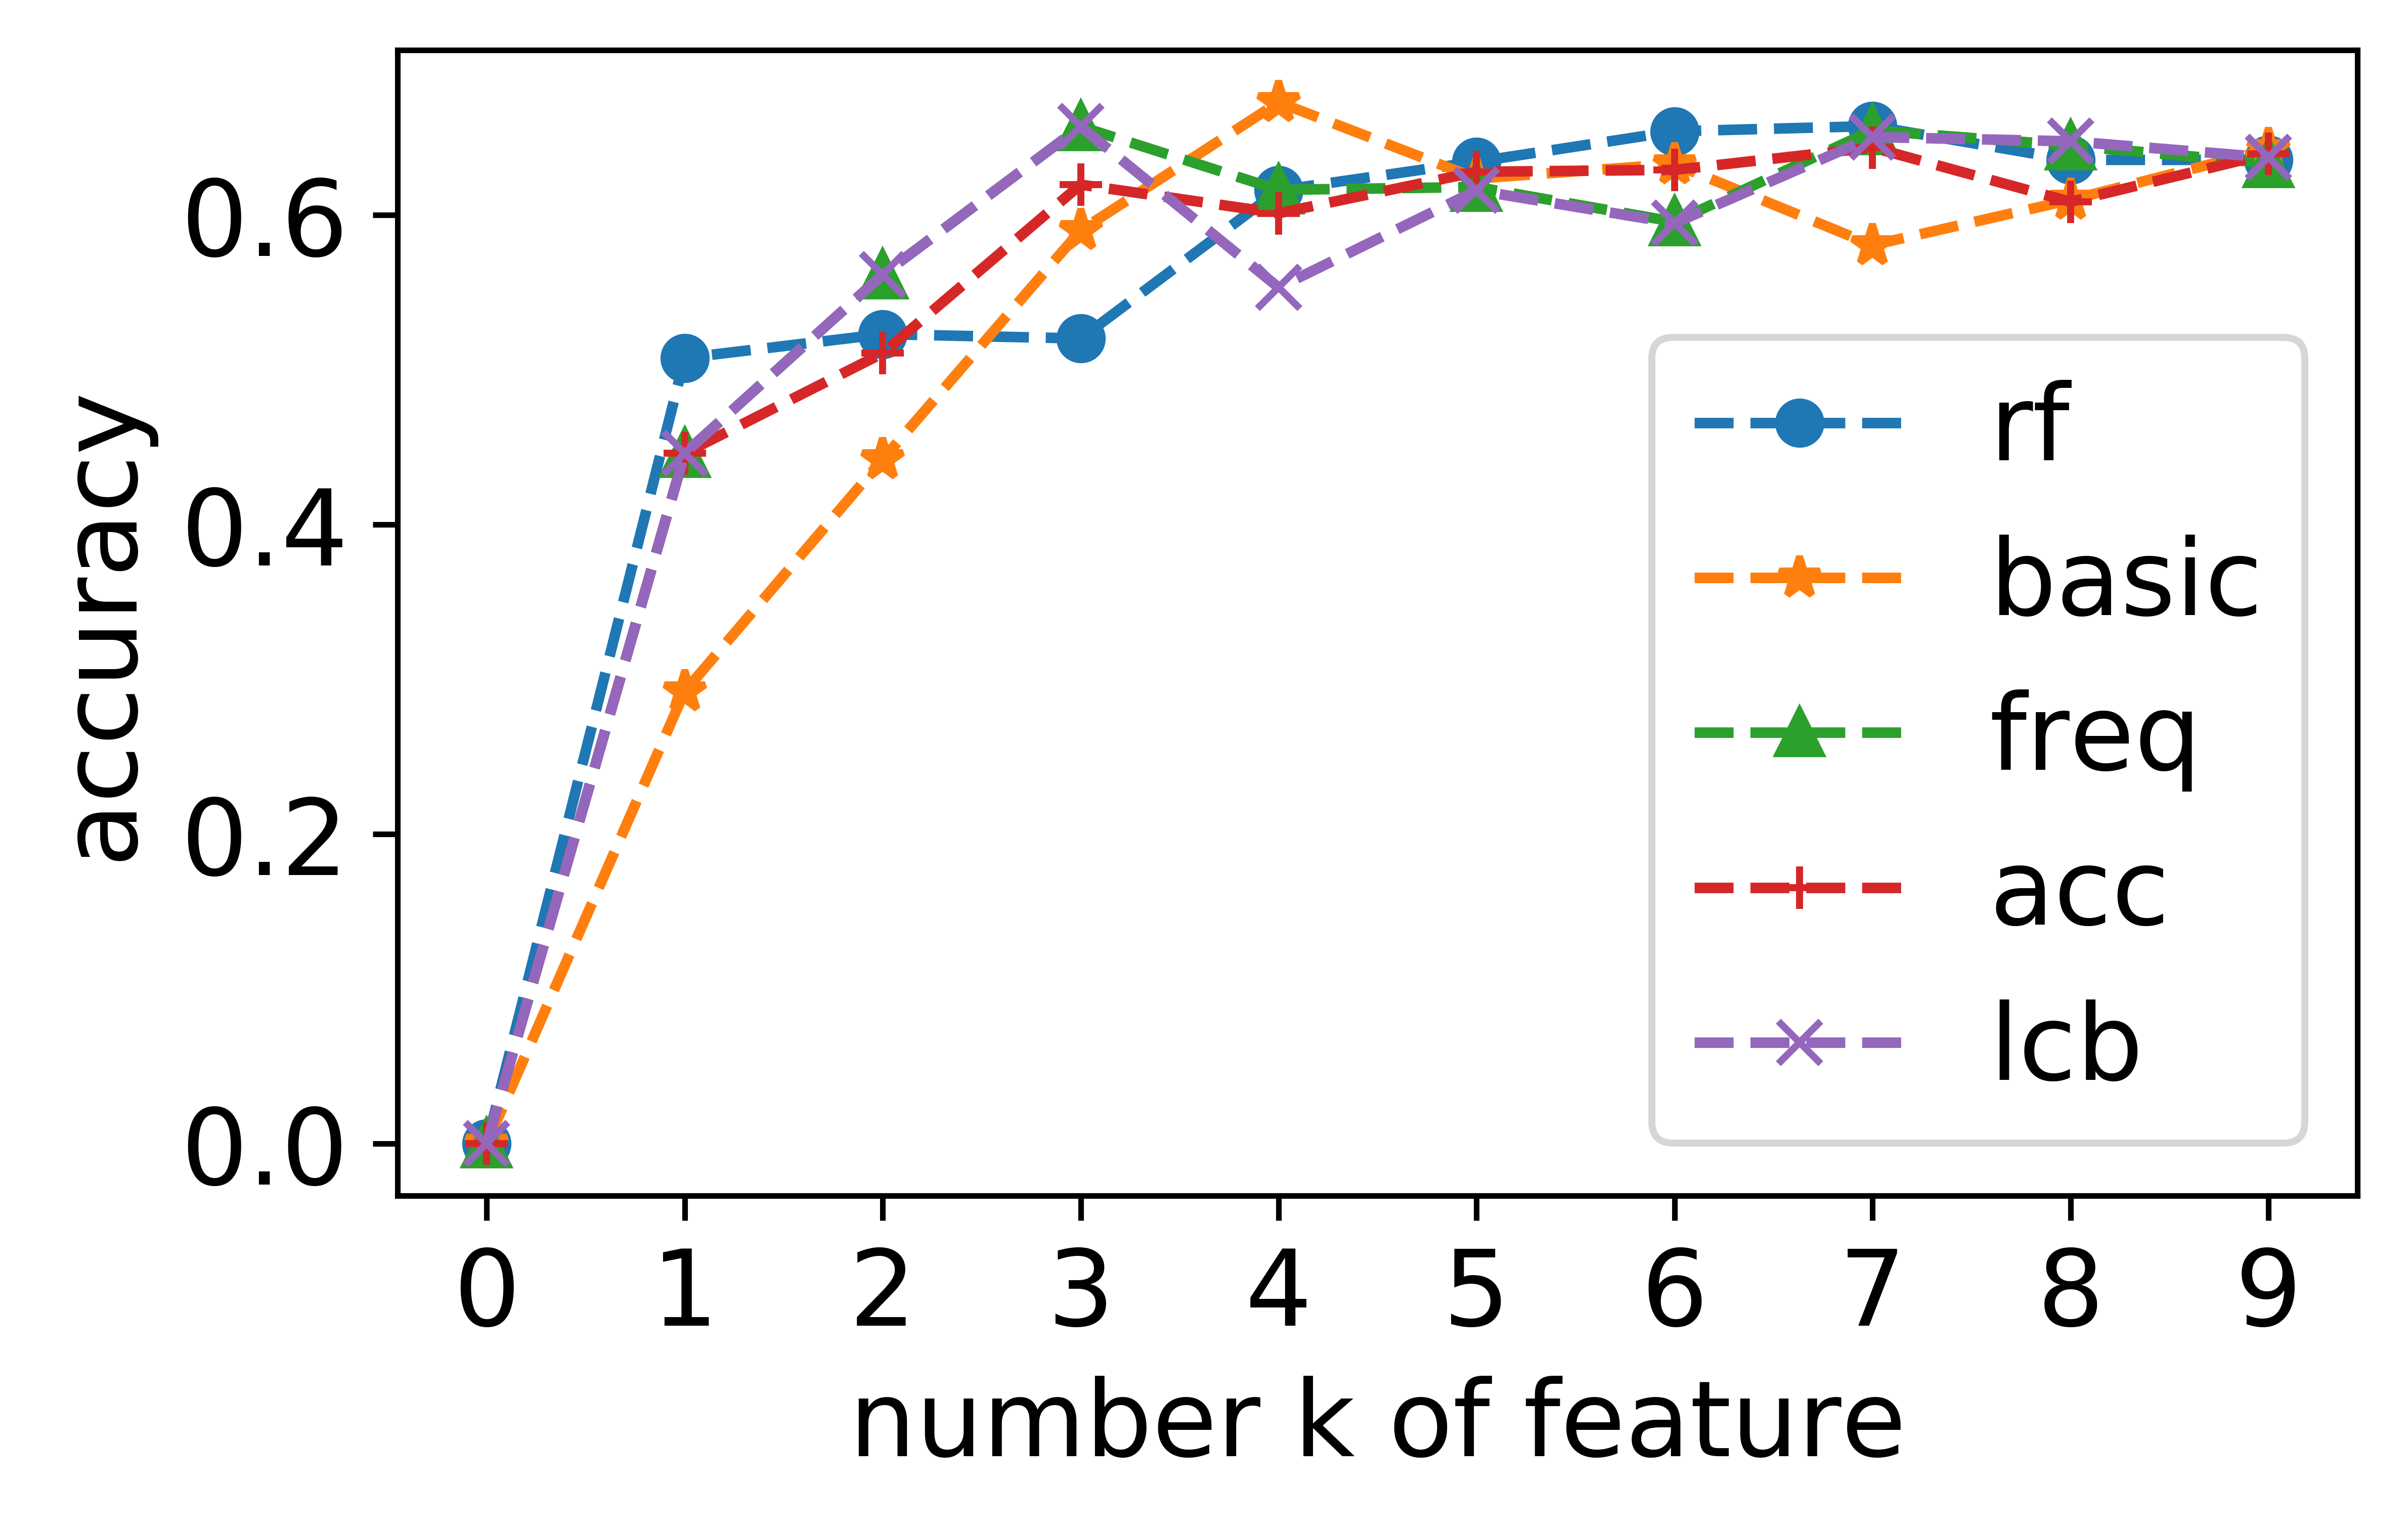

In [81]:
glass_rf_score = fi_module.fs(X_glass, y_glass, "c", glass_rf)
glass_basis_score = fi_module.fs(X_glass, y_glass, "c", glass_basis)
glass_freq_score = fi_module.fs(X_glass, y_glass, "c", glass_freq)
glass_score_score = fi_module.fs(X_glass, y_glass, "c", glass_score)
glass_ucb_score = fi_module.fs(X_glass, y_glass, "c", glass_ucb)

x = np.arange(len(glass_rf)+1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 3), dpi=1000)
plt.xticks(x)
plt.plot(x, glass_rf_score, marker="o", linestyle = "--")
plt.plot(x, glass_basis_score, marker="*", linestyle = "--")
plt.plot(x, glass_freq_score, marker="^", linestyle = "--")
plt.plot(x, glass_score_score, marker="+", linestyle = "--")
plt.plot(x, glass_ucb_score, marker="x", linestyle = "--")
#plt.legend(["rf", "basic", "proposed(freq)", "proposed(acc)" , "proposed(ucb)"])
plt.legend(["rf", "basic", "freq", "acc", "lcb"])

plt.xlabel('number k of feature')
plt.ylabel("accuracy")
plt.savefig('glass.pdf', bbox_inches="tight")

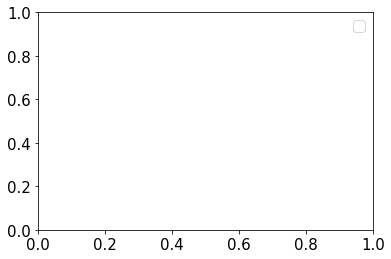

In [38]:
plt.legend(["rf", "basic", "proposed(freq)", "proposed(acc)" , "proposed(ucb)"])

# diabetes

In [69]:
from sklearn.datasets import load_diabetes

db= load_diabetes()
X_db = pd.DataFrame(data=db.data, columns=db.feature_names)
print(X_db.head())
y_db = pd.DataFrame(data=db.target)
y_db = y_db.rename(columns={0: 'return'})
print(y_db.head())
y_db = y_db.values.ravel()

#fi_module.dt_score(X_db, y_db, 50)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
   return
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0


In [70]:
db_rf, db_basis, db_freq, db_score, db_ucb = fi_module.ex(X_db, y_db, 1, "r", 100, 0.3, 0)

------------------------------
rf's feature importance
X1  : 0.00508
X2  : 0.00084
X3  : 0.41349
X4  : 0.07856
X5  : 0.00767
X6  : 0.01198
X7  : 0.03858
X8  : 0.01728
X9  : 0.40459
X10 : 0.02194
------------------------------
I_basis's feature importance
X1  : 0.05992
X2  : 0.19972
X3  : 0.09986
X4  : 0.10652
X5  : 0.08322
X6  : 0.06241
X7  : 0.08811
X8  : 0.07489
X9  : 0.1033
X10 : 0.12205
------------------------------
I_freq's feature importance
X1  : 0.01354
X2  : 0.04514
X3  : 0.22572
X4  : 0.19262
X5  : 0.03135
X6  : 0.02351
X7  : 0.09958
X8  : 0.03386
X9  : 0.23351
X10 : 0.10116
------------------------------
I_score's feature importance
X1  : 0.0903
X2  : 0.11852
X3  : 0.10156
X4  : 0.10142
X5  : 0.08899
X6  : 0.09115
X7  : 0.10168
X8  : 0.09798
X9  : 0.10361
X10 : 0.10478
------------------------------
I_ucb's feature importance
X1  : 0.0
X2  : 0.10676
X3  : 0.19352
X4  : 0.19644
X5  : 0.00223
X6  : 0.0
X7  : 0.12018
X8  : 0.01062
X9  : 0.20216
X10 : 0.1681


5602.721474363516
5115.583582546254
5835.734483057937
5115.583582546254
5835.734483057937


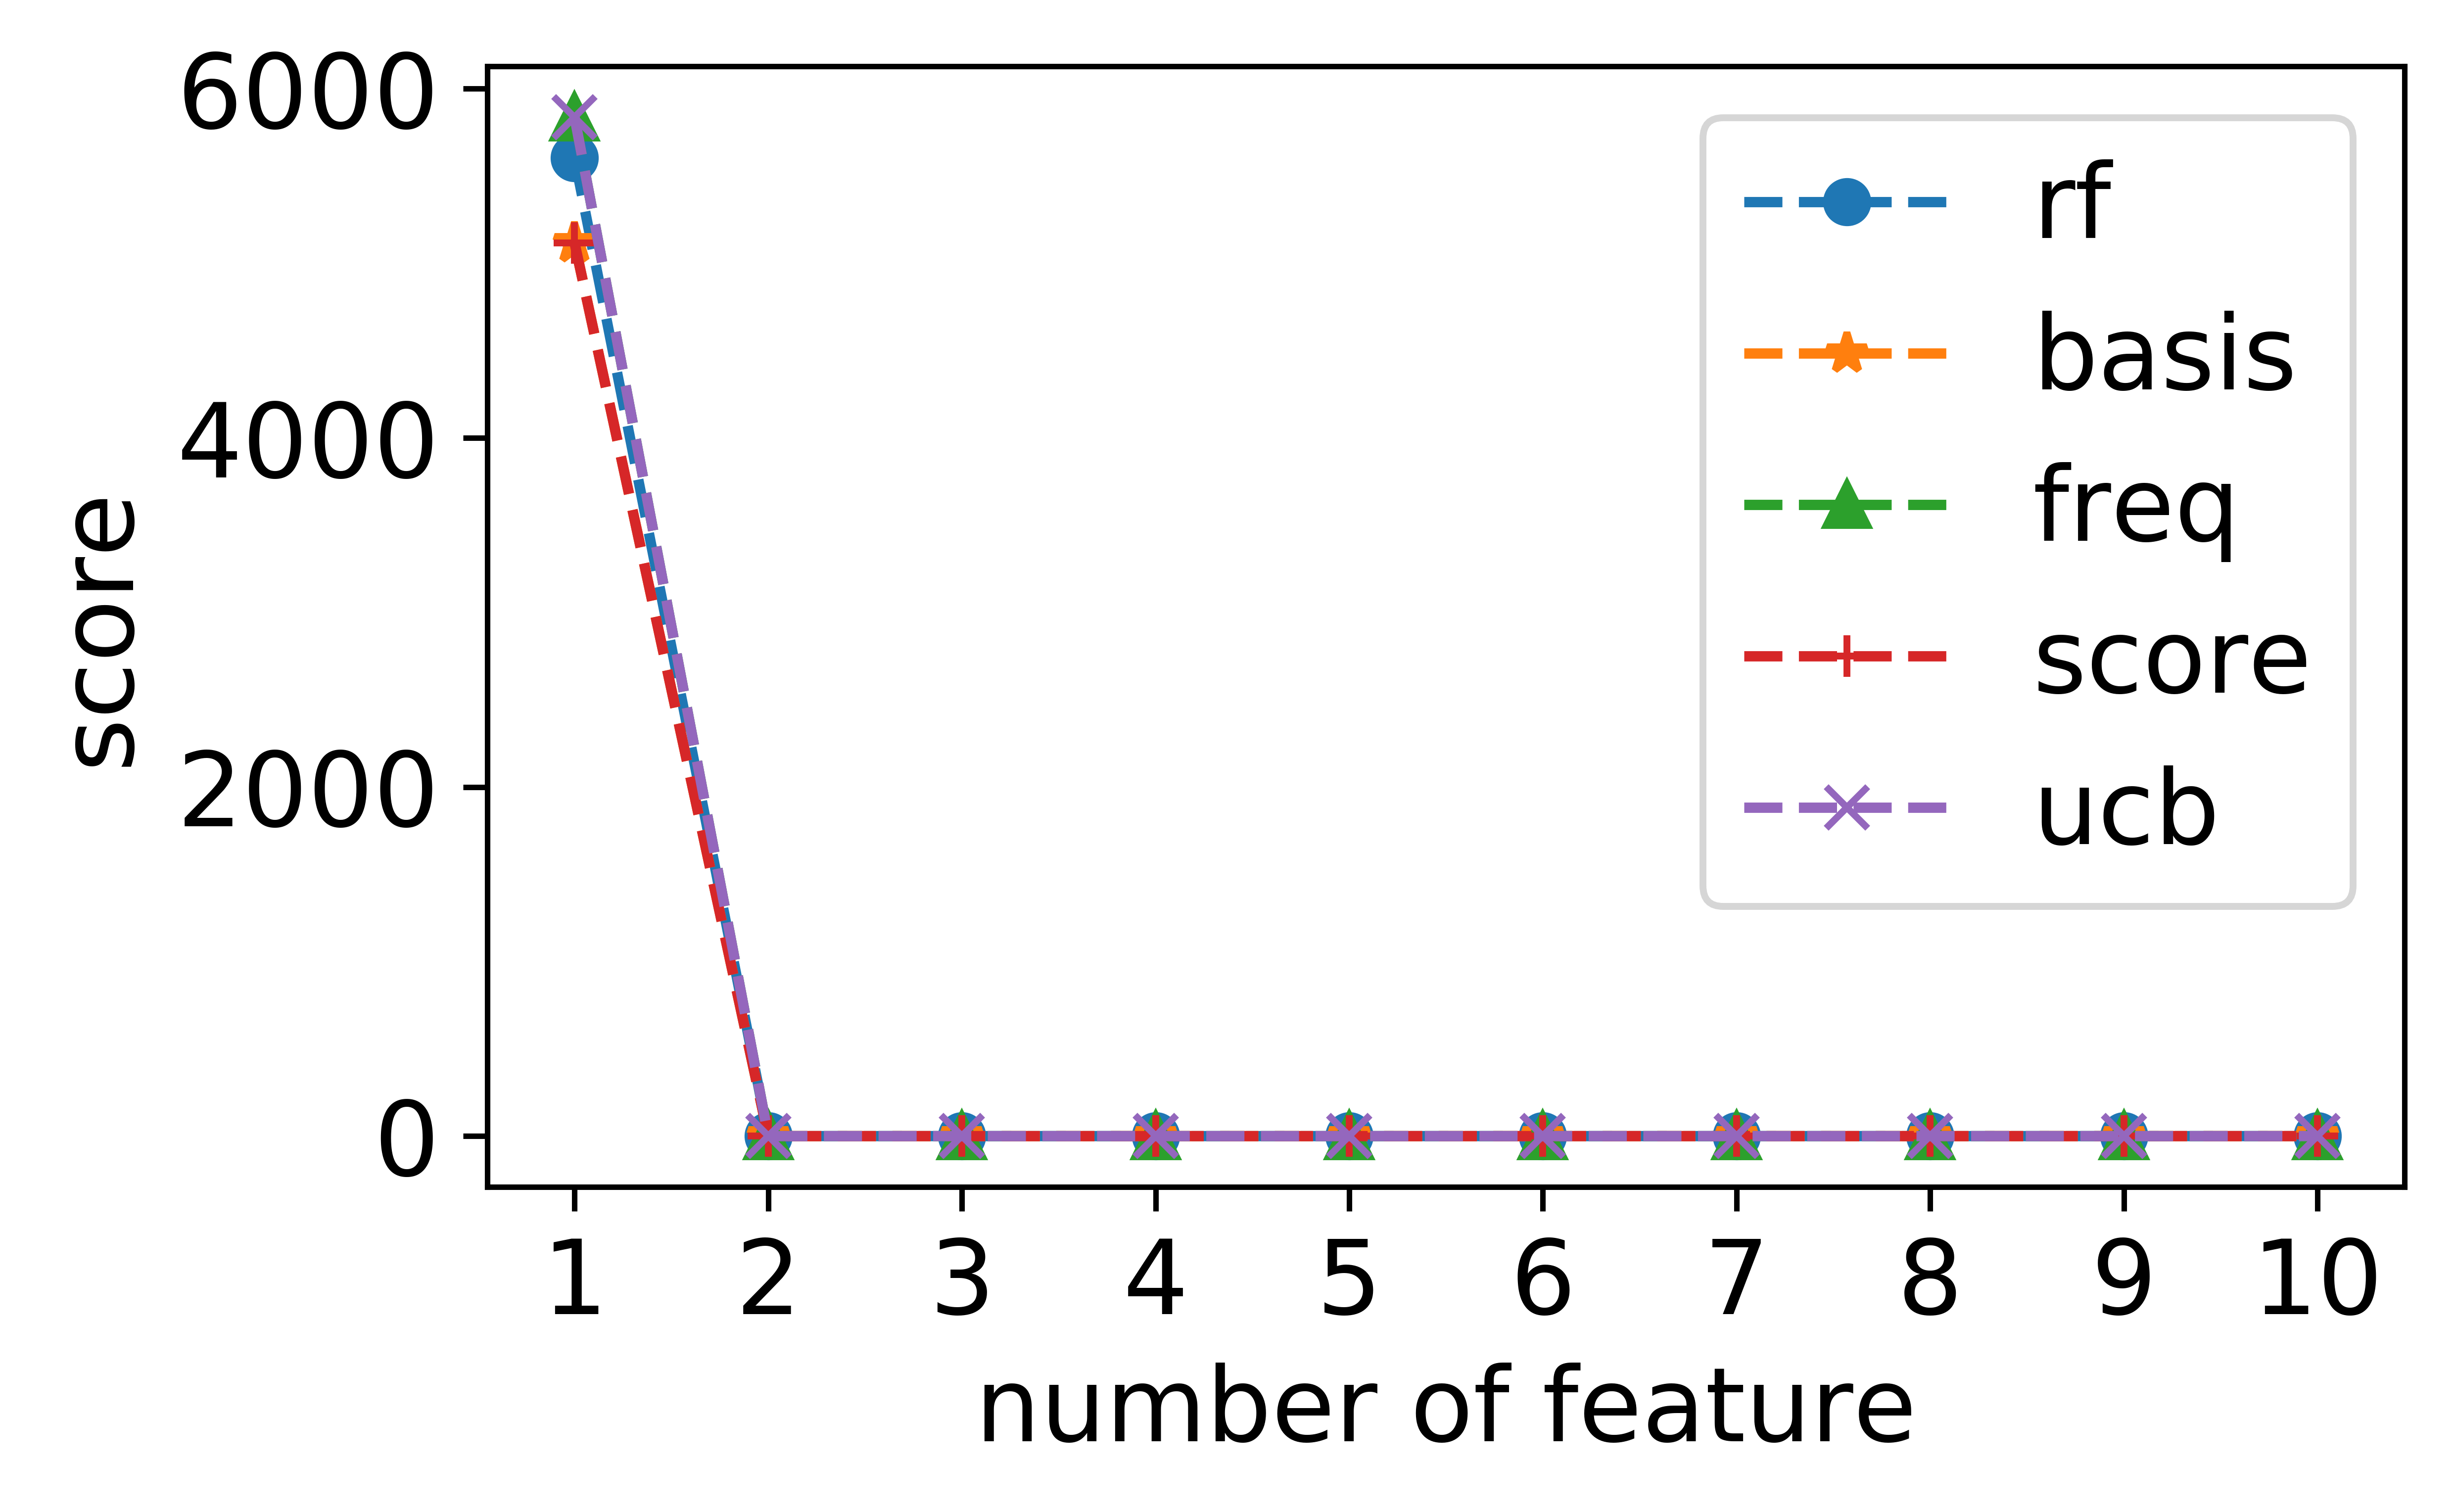

In [71]:
db_rf_score = fi_module.fs_rf(X_db, y_db, "r", db_rf)
db_basis_score = fi_module.fs_rf(X_db, y_db, "r", db_basis)
db_freq_score = fi_module.fs_rf(X_db, y_db, "r", db_freq)
db_score_score = fi_module.fs_rf(X_db, y_db, "r", db_score)
db_ucb_score = fi_module.fs_rf(X_db, y_db, "r", db_ucb)

x = np.arange(1, len(db_rf)+1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 3), dpi=1000)
plt.xticks(x)
plt.plot(x, db_rf_score, marker="o", linestyle = "--")
plt.plot(x, db_basis_score, marker="*", linestyle = "--")
plt.plot(x, db_freq_score, marker="^", linestyle = "--")
plt.plot(x, db_score_score, marker="+", linestyle = "--")
plt.plot(x, db_ucb_score, marker="x", linestyle = "--")
plt.legend(["rf", "basis", "freq", "score" , "ucb"])

plt.xlabel('number of feature')
plt.ylabel("score")
plt.savefig('db.pdf', bbox_inches="tight")

0.1791595615552956
-0.002778268229744585
0.14324260896214902
-0.002778268229744585
0.14324260896214902


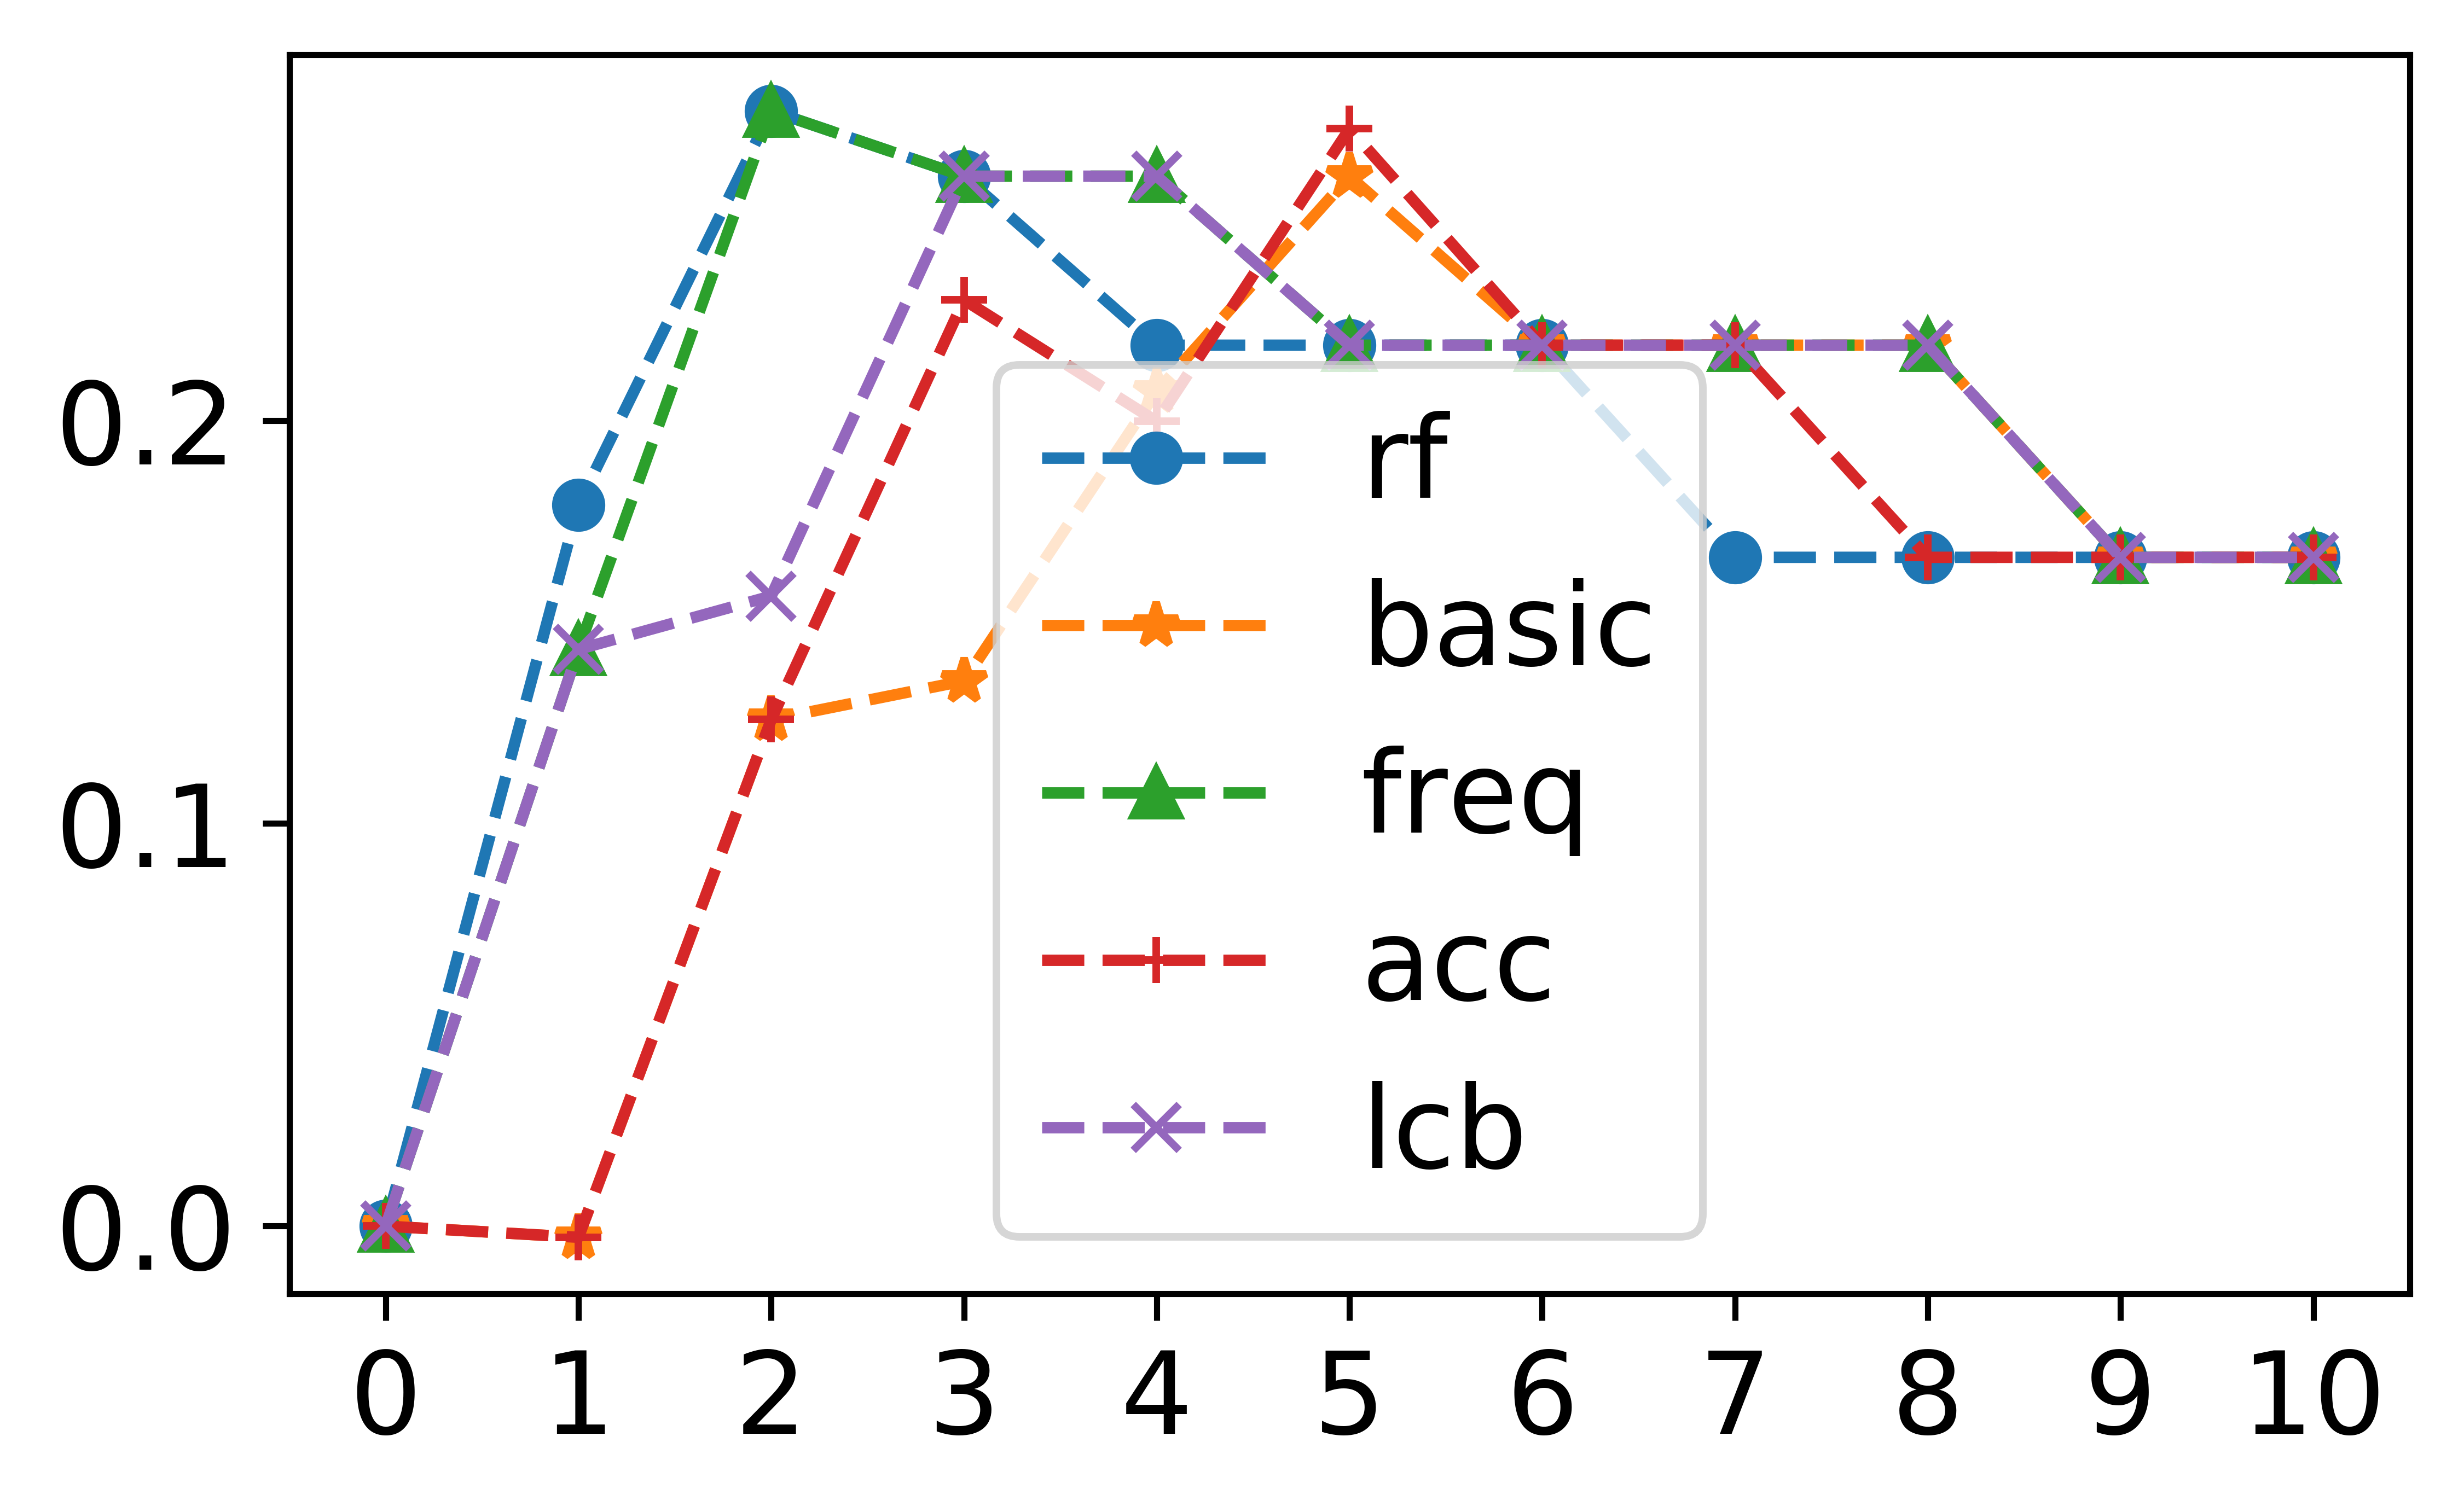

In [73]:
db_rf_score = fi_module.fs(X_db, y_db, "r", db_rf)
db_basis_score = fi_module.fs(X_db, y_db, "r", db_basis)
db_freq_score = fi_module.fs(X_db, y_db, "r", db_freq)
db_score_score = fi_module.fs(X_db, y_db, "r", db_score)
db_ucb_score = fi_module.fs(X_db, y_db, "r", db_ucb)

x = np.arange(len(db_rf) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 3), dpi=1000)
plt.xticks(x)
plt.plot(x, db_rf_score, marker="o", linestyle = "--")
plt.plot(x, db_basis_score, marker="*", linestyle = "--")
plt.plot(x, db_freq_score, marker="^", linestyle = "--")
plt.plot(x, db_score_score, marker="+", linestyle = "--")
plt.plot(x, db_ucb_score, marker="x", linestyle = "--")
#plt.legend(["rf", "basis", "freq", "score" , "ucb"])
plt.legend(["rf", "basic", "freq", "acc", "lcb"])

# boston

In [ ]:
from sklearn.datasets import load_boston

boston= load_boston()
X_bos = pd.DataFrame(data=boston.data, columns=boston.feature_names)
print(X_bos.head())
y_bos = pd.DataFrame(data=boston.target)
y_bos = y_bos.rename(columns={0: 'return'})
print(y_bos.head())
y_bos = y_bos.values.ravel()

#fi_module.dt_score(X_db, y_db, 50)

In [ ]:
boston_rf, boston_basis, boston_freq, boston_score, boston_ucb = fi_module.ex(X_bos, y_bos, 1, "r", 100, 0.3, 0)

In [ ]:
fi_module.ex_fs(X_bos, y_bos, 50, "r", 100, 0.3, 0)

In [ ]:
boston_rf_score = fi_module.fs_rf(X_bos, y_bos, "r", boston_rf)
boston_basis_score = fi_module.fs_rf(X_bos, y_bos, "r", boston_basis)
boston_freq_score = fi_module.fs_rf(X_bos, y_bos, "r", boston_freq)
boston_score_score = fi_module.fs_rf(X_bos, y_bos, "r", boston_score)
boston_ucb_score = fi_module.fs_rf(X_bos, y_bos, "r", boston_ucb)

x = np.arange(1, len(boston_rf)+1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 3), dpi=1000)
plt.xticks(x)
plt.plot(x, boston_rf_score, marker="o", linestyle = "--")
plt.plot(x, boston_basis_score, marker="*", linestyle = "--")
plt.plot(x, boston_freq_score, marker="^", linestyle = "--")
plt.plot(x, boston_score_score, marker="+", linestyle = "--")
plt.plot(x, boston_ucb_score, marker="x", linestyle = "--")
plt.legend(["rf", "basis", "freq", "score" , "ucb"])

plt.xlabel('number of feature')
plt.ylabel("score")
plt.savefig('boston.pdf', bbox_inches="tight")

In [ ]:
boston_rf_score = fi_module.fs(X_bos, y_bos, "r", boston_rf)
boston_basis_score = fi_module.fs(X_bos, y_bos, "r", boston_basis)
boston_freq_score = fi_module.fs(X_bos, y_bos, "r", boston_freq)
boston_score_score = fi_module.fs(X_bos, y_bos, "r", boston_score)
boston_ucb_score = fi_module.fs(X_bos, y_bos, "r", boston_ucb)

x = np.arange(len(boston_rf) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 3), dpi=1000)
plt.xticks(x)
plt.plot(x, boston_rf_score, marker="o", linestyle = "--")
plt.plot(x, boston_basis_score, marker="*", linestyle = "--")
plt.plot(x, boston_freq_score, marker="^", linestyle = "--")
plt.plot(x, boston_score_score, marker="+", linestyle = "--")
plt.plot(x, boston_ucb_score, marker="x", linestyle = "--")
plt.legend(["rf", "basis", "freq", "score" , "ucb"])

In [ ]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import math
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from functools import partial

In [ ]:
def objective(X, y, trial):
    """最小化する目的関数"""
    params = {
        'max_depth': int( trial.suggest_loguniform('max_depth', 2, 32) ) ,
        'min_samples_leaf': int( trial.suggest_loguniform('min_samples_leaf', 1e+0, 1e+2) ),
        'max_leaf_nodes': int( trial.suggest_loguniform('max_leaf_nodes', 1e+0, 1e+3) ),
    }

    # モデルを作る
    model = DecisionTreeRegressor(**params)

    # 5-Fold CV / Accuracy でモデルを評価する
    kf = KFold(n_splits=5, random_state=0)
    scores = cross_validate(model, X=X, y=y, cv=kf)
    # 最小化なので 1.0 からスコアを引く
    return 1.0 - scores['test_score'].mean()

In [ ]:
f = partial(objective, X_db, y_db)
study = optuna.create_study()
study.optimize(f, n_trials=100)

In [ ]:
print('params :', study.best_params)